# PAC4: LIMPIEZA DE DATOS



En esta PEC vamos a trabajar el proceso de  la limpieza de datos. En primer lugar, limpiaremos y filtraremos datos. En segundo lugar, realizaremos análisis exploratorio de los datos que nos permitirá continuar ocn la limpieza y pre- procesado de los datos. Dichos análisis los acompañaremos con visualizaciones. Por último, haremos una aproximacion a posibles problemas de regresion y clasificación. 

**Particularmente, en esta PAC, trabajaremos en 3 ejercicios que girarán en torno a conjuntos de datos relacionados con los menus del McDonals (Ejercicio 1) y con las ofertas de trabajo relacionadas con Ciencia de Datos (Ejercicio 2). El tercer ejercicio trabajará un dataset relativo a la salud mental.**

**NOTA:** Se ha dejado una celda indicada para contestar las cuestiones y implementar el código solicitado, no obstante, si necesitaís más o preferís organizarlo de otra manera, podeis añadir las celdas que considereis convenientes. Asegurandoos siempre que contestais a las questiones planteadas.


In [ ]:
# importar librerias
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
SMALL_SIZE = 8 +10
MEDIUM_SIZE = 10 +10
BIGGER_SIZE = 12 +10

plt.rc('font', size=SMALL_SIZE)   # controls default text sizes 
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title 
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels 
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels 
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels 
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize 
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

<ipython-input-2-2f7645b8626c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Introducción

En esta PAC vamos a utilizar en gran medida la libreria Pandas de Python puesto que nos permite manipular los datos estructurados en dataframes. La librería numpy también nos va a servir de apoyo en algunas instrucciones. 

Como ya hemos podido comprobar en PACs anteriores, Pandas es una librería de python destinada al análisis de datos, que proporciona unas estructuras de datos flexibles y que permite trabajar con ellos de forma muy eficiente. Las estructuras de datos más utilizadas que ofrece pandas son:

- **Series**: Son arrays unidimensionales con indexación. Es decir, arrays con índice.
 
- **DataFrame**: Son estructuras de datos similares a las tablas de bases de datos relacionales como SQL.


_Ejemplo de serie y dataframe:_

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=[1,5,7,9,8,6,9,10,11]
index=[0,1,2,3,4,5,6,7,8]
serie = pd.Series(data, index=index)
serie.head(2)

0    1
1    5
dtype: int64

In [ ]:
df = pd.DataFrame(
    {
        'id': ['A1','A2','A3','A4','A4','A5','A6','A7','A8','A9','A10'],
        'nombre': ['Pedro', 'Juan', 'María', 'José', 'José', 'Alonso', 'Óscar', 'Javier', 'Irene', 'Sara', 'Andrea'],
        'edad': [10, 9, 15, 12, 12, 11, 14, 13, 14, 16, 17],
        'altura': [140, 135, 160, 128, 128, np.nan, 134, 142, 136,141,143],
        'peso':[56, 75, 80, 63, 60, 72, 82, 54, 82, 68, 56],
      'ciudad': ['Valencia', 'Alicante','Valencia','','','Barcelona','León','Segovia','Barcelona','Burgos','Madrid']
    })
df.head(2)

,id,nombre,edad,altura,peso,ciudad
0,A1,Pedro,10,140.0,56,Valencia
1,A2,Juan,9,135.0,75,Alicante


In [ ]:
# Conocer tipo de variables
df.dtypes

id         object
nombre     object
edad        int64
altura    float64
peso        int64
ciudad     object
dtype: object

In [ ]:
 #Para cambiar el tipo de datos que tiene asignado una columna, se puede hacer con la función df.astype()
 #Ejemplo
 df['peso'].astype(float) 

0     56.0
1     75.0
2     80.0
3     63.0
4     60.0
5     72.0
6     82.0
7     54.0
8     82.0
9     68.0
10    56.0
Name: peso, dtype: float64

Pandas permite cargar datos en formato csv mediante la funcion **pd.read\_csv** o **pd.read\_table**. De la misma forma, se puede guardar el dataframe en un csv con la función **df.to\_csv()**. Se recomienda que reviseis los argumentos que se le deben pasar a las funciones puesto que las vais a tener que utilizar en los ejercicios planteados.

Con el dataframe, se pueden realizar diferentes acciones muy útiles y relevantes desde el punto de vista de la limpieza de datos. Estas son:

- Eliminar valores duplicados (**df.drop_duplicates()**)
- Elimnar valores NA (**df.dropna()**)
- Reemplazar valores NA por un determinado valor (**df.fillna()**)
- Filtrar filas basándose en los valores de las mismas en las diferentes columnas. 

Además, se pueden agrupar datos por valores de una columna (**df.groupby()**), juntar diferentes dataframes indicando en base a qué columna (o columnas) se quiere unir (**df1.merge(df2)**), aplicar una funcion a los valores de una columna (**df.apply(funcion)**), o ordenar las filas del dataframe de acuerdo a los valores de una columna especificada de forma ascendente o descendente (**df.sort_values('nombre_columna')**).



_Ejemplos de la aplicación de las funciones mencionadas:_

In [ ]:
# Eliminar valores duplicados:
df_sin_duplicados= df.drop_duplicates()

#Eliminar filas cuyos valores de ciudad estén duplicados
df_sin_duplicados_ciudad= df.drop_duplicates(subset='ciudad')

#Eliminar valores NA
df_sin_na= df.dropna()

 #Reemplazar valores NA por zeros
df_na_remplazados=df.fillna(0)

# Filtrar personas de Valencia
df_valencia=df[df['ciudad']=='Valencia']

# Filtrar personas de valencia y qeu pesen más de 60 kg
df_valencia_peso_mayor_60= df[(df['ciudad']=='Valencia')& (df['peso']>60)]

#Agrupar datos por ciudad y obtener la media
df_media_por_ciudad= df.groupby('ciudad').mean()

# Crear una columna que sea el indice de masa corporal
df['IMC']= df['peso']/(df['altura']/100)

# Aplicar la función de saturación a la columna IMC (indice de masa corporal que sature en 18 por debajo y en 30 por arriba)

def saturacion_IMC (x):
  if x>30:
    return 30
  elif x<18:
    return 18
  else:
    return x

df['IMC_saturada']= df['IMC'].apply(saturacion_IMC)

# Juntar df con df2 por el valor de la ciudad

df2 = pd.DataFrame(
    {
      'ciudad': ['Valencia', 'Alicante','Barcelona','León','Segovia','Burgos','Madrid'], 
      'Comunidad_autonoma':['Comunidad Valenciana', 'Comunidad Valenciana','Catalunya','Castilla León','Castilla León','Castilla León','Madrid']
    })

df=df.merge(df2, left_on='ciudad', right_on='ciudad')

# Ordenar el dataframe de forma ascendente, de acuerdo a los valores de la edad
df=df.sort_values('edad')


<ipython-input-8-4897a0099ddf>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_media_por_ciudad= df.groupby('ciudad').mean()


Otras instrucciones que resultan interesantes, son las que nos permiten obtener métrics estadísticas como la media (**df.mean()**), la desviación estándar (**df.std()**), la mediana (**df.median()**), el maximo (**df.max()**), o el mínimo (**df.max()**) de los valores de las columnas numéricas. La función **df.describe()** devuelve un resumen de todas las metricas anteriores para las columnas numéricas.

In [ ]:
# Ejemplo obtención valores de métricas estadísticas

metricas_edad=[df['edad'].mean(), df['edad'].median(),df['edad'].std(), df['edad'].max(), df['edad'].min()]

print('Metricas estadísticas variable edad: ' , metricas_edad, '\n')
df.describe()

Metricas estadísticas variable edad:  [13.222222222222221, 14.0, 2.7284509239574835, 17, 9] 



,edad,altura,peso,IMC,IMC_saturada
count,9.000000,8.000000,9.000000,8.000000,8.0
mean,13.222222,141.375000,69.444444,49.057458,30.0
std,2.728451,8.245128,11.544600,9.403556,0.0
min,9.000000,134.000000,54.000000,38.028169,30.0
25%,11.000000,135.750000,56.000000,39.790210,30.0
50%,14.000000,140.500000,72.000000,49.113475,30.0
75%,15.000000,142.250000,80.000000,56.740196,30.0
max,17.000000,160.000000,82.000000,61.194030,30.0


Cuando tenemos variable categóricas o discretas, la librería pandas nos permite obtener tablas de frecuencias para cada variable (**df['nombre_columna'].value_counts()**) o tablas de contingencia que relacionan unas variables categóricas con otras (**pd.crosstab(index=df['nombre_columna_1'],
            columns=df['nombre_columna_2'], margins=True)** ).

_Ejemplos:_

In [ ]:
#  tabla de frecuencia absoluta de la variable ciudad
df['ciudad'].value_counts()

Valencia     2
Barcelona    2
Alicante     1
Segovia      1
León         1
Burgos       1
Madrid       1
Name: ciudad, dtype: int64

In [ ]:
#  tabla de frecuencia absoluta de la variable ciudad
100 *df['ciudad'].value_counts() / len(df['ciudad'])

Valencia     22.222222
Barcelona    22.222222
Alicante     11.111111
Segovia      11.111111
León         11.111111
Burgos       11.111111
Madrid       11.111111
Name: ciudad, dtype: float64

In [ ]:
# Tabla de contingencia ciudad / edad
pd.crosstab(index=df['ciudad'],
            columns=df['edad'], margins=True)

edad,9,10,11,13,14,15,16,17,All
ciudad,,,,,,,,,
Alicante,1,0,0,0,0,0,0,0,1
Barcelona,0,0,1,0,1,0,0,0,2
Burgos,0,0,0,0,0,0,1,0,1
León,0,0,0,0,1,0,0,0,1
Madrid,0,0,0,0,0,0,0,1,1
Segovia,0,0,0,1,0,0,0,0,1
Valencia,0,1,0,0,0,1,0,0,2
All,1,1,1,1,2,1,1,1,9


In [ ]:
# Tabla de contingencia ciudad / edad en porcentajes relativos al total
pd.crosstab(index=df['ciudad'], columns=df['edad'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

edad,9,10,11,13,14,15,16,17,All
ciudad,,,,,,,,,
Alicante,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111
Barcelona,0.000000,0.000000,11.111111,0.000000,11.111111,0.000000,0.000000,0.000000,22.222222
Burgos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,11.111111
León,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111
Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,11.111111
Segovia,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,11.111111
Valencia,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,22.222222
All,11.111111,11.111111,11.111111,11.111111,22.222222,11.111111,11.111111,11.111111,100.000000


Para conocer la sintaxis de las funciones que se han presentado se recomienda que se consulte la documentación de pandas (https://pandas.pydata.org/docs/user_guide/index.html). 



---




Otra librería que resulta interesante en la limpieza de datos es la de expresiones regulares o regrex, **re**. 

Las _expresiones regulares_ son unas secuencias de caracteres que forman un patrón de búsqueda, las cuales son formalizadas por medio de una sintaxis específica. De esta forma, podemos:
- Limpiar valores de variables que contengan carácteres especiales como '/t', '/n', entre otros
- Eliminar espacios en blanco 
- Homogeneizar strings (eliminar acentos o carácteres especiales, transformar a mínusculas o mayusculas)
- Buscar y sustituir strings o partes de strings. 
- ...

_Ejemplos de la utilización de la librería re en los dataframes anteriores:_

In [ ]:
import re

In [ ]:
string1='Hola María, ¿Qué tal?'
new_string1 = re.sub('[^a-zA-Z0-9 \n\.]', '', string1)

In [ ]:
new_string1.replace(' ', '')

'HolaMaraQutal'

In [ ]:
# Eliminar caracteres con acentos y carácteres especiales a un strings
string1='Hola María, ¿Qué tal?'
new_string1 = re.sub('[^a-zA-Z0-9 \n\.]', '', string1)
print(string1)
print(new_string1)

# Eliminar carácteres con acentos y espacios en blanco de los valores de la columna nombre
df['nombre'].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x).replace(' ', ''))

# Homostring1='Hola María, ¿Qué tal?'
string2='Hola María, ¿Qué tal?'
new_string2 = string2.lower()
print('\n')
print(string2)
print(new_string2)

# Eliminar spacios en blanco a principio y a final
string3=' Hola María, ¿Qué tal? '
new_string3 = string3.strip()
print('\n')
print(string3)
print(new_string3)


# Separar cada palabra en elementos diferentes
string4=' Hola María, ¿Qué tal? '
new_string4 = string4.split()
print('\n')
print(string4)
print(new_string4)

# Sustituir los espacios en blanco por '-'
string5=' Hola María, ¿Qué tal? '
new_string5 = re.sub(' ', '-', string5)
print('\n')
print(string5)
print(new_string5)


Hola María, ¿Qué tal?
Hola Mara Qu tal


Hola María, ¿Qué tal?
hola maría, ¿qué tal?


 Hola María, ¿Qué tal? 
Hola María, ¿Qué tal?


 Hola María, ¿Qué tal? 
['Hola', 'María,', '¿Qué', 'tal?']


 Hola María, ¿Qué tal? 
-Hola-María,-¿Qué-tal?-


Una parte importante en el tratamiento y limpieza de datos es realizar un análisis exploratorio de los mismos. Como ya se ha introducido en la teoría,  esto se refiere tanto a la obtencion de las métricas e indicadores estadísticos más relevantes como a la identificación de las distribuciones que siguen los datos numéricos. Con esta finalidad, la librería  **scipy** permite realizar diferentes tests estadísticos como el de normalidad y homocedasticidad, entre otros. 

_Ejemplos de la realización de los test estadísticos más relevantes para la realización de esta PAC:_

In [ ]:
#Test de normalidad --> Test Shapiro - wilk (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
# Hipotesis nula (p-values> 0.05): datos normales
 
from scipy import stats
variable_1 = stats.norm.rvs(size=100) # genera 100 números aleatorios que siguen una distribución normal.
statistic, p_value = stats.shapiro(variable_1)
print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value)

Resultados Test Shapiro (stadístico, p-values):  0.991176187992096 0.7588539719581604


In [ ]:
#Test de normalidad --> Test Kolmogorov-Smirnov (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest)

statistic, p_value = stats.kstest(variable_1, 'norm', alternative='less')
print('Resultados Test Kolmogorov-Smirnov (stadístico, p-values): ', statistic, p_value)


Resultados Test Kolmogorov-Smirnov (stadístico, p-values):  0.021926080741797027 0.8953717122642889


Ambos tests de normalidad ofrecen un p-value mayor que 0.5, aceptando por tanto la hipotesis nula de que la variable_1 sigue una distribución normal. 

In [ ]:
#Test de homocedasticidad  entre los grupos que se van a comparar o entre las variables que se van a analizar (si datos normales) --> Test  Levene (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html) 
# La hipótesis nula: las variables tienen varianzas similares. 

variable_1 = stats.norm.rvs(size=100)
variable_2 = stats.norm.rvs(size=100)
stat, p = stats.levene(variable_1,variable_2)
print('Resultados Test Levene (stadístico, p-values): ', stat, p)



Resultados Test Levene (stadístico, p-values):  0.16187001061229792 0.6878746485477043


De acuerdo con el resultado del test, la variable_1 y la variable_2 tienen varianzas similares. 



In [ ]:
#Test de homocedasticidad  entre los grupos que se van a comparar o entre las variables que se van a analizar (si datos no normales) --> Test   Fligner-Killeen (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html)
# La hipótesis nula: las variables tienen varianzas similares. 

import numpy as np
variable_1 = stats.norm.rvs(size=100)
variable_2 = np.linspace(-15, 15, num=100)
stat, p = stats.fligner(variable_1,variable_2)
print('Resultados Test Levene (stadístico, p-values): ', stat, p)



Resultados Test Levene (stadístico, p-values):  106.48028500520651 5.786531416186407e-25


De acuerdo con el resultado del test, la variable_1 y la variable_2 NO tienen varianzas similares. 



In [ ]:
# Test comparación grupos (datos normales) -> t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
# Hipótesis nula: las dos muestras de dos grupos independientes tienen media identica. Por tanto, el factor grupo no tiene efecto. 

grupo_1 = stats.norm.rvs(size=100)
grupo_2 = stats.norm.rvs(size=100)
stat, p = stats.ttest_ind(grupo_1,grupo_2)
print('Resultados T-Test (stadístico, p-values): ', stat, p)



Resultados T-Test (stadístico, p-values):  0.06427804453448056 0.9488136828734978


In [ ]:
# Test comparación grupos (datos no normales) -> Test Kruskal Wallis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
# Hipótesis nula: las dos muestras de dos grupos independientes tienen mediana identica. Por tanto, el factor grupo no tiene efecto. 

import numpy as np
grupo_1 = stats.norm.rvs(size=100)
grupo_2 = np.linspace(-15, 15, num=100)
stat, p = stats.kruskal(grupo_1,grupo_2)
print('Resultados Test Kruskal Wallis (stadístico, p-values): ', stat, p)


Resultados Test Kruskal Wallis (stadístico, p-values):  0.017408955223913836 0.8950293769177637


En ambos ejemplos el p-value es mayor de 0.05, por tanto se interpreta que el factor grupo no tiene efecto. 

In [ ]:
# Test pareado comparación distribuciones (datos no normales) -> Test Kruskal Wallis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.scipy.stats.mannwhitneyu.html)
# Hipótesis nula: las dos muestras tienen distribuciones similares (p.tanto, se puede asumir medianas similares). 

import numpy as np
grupo_1 = stats.norm.rvs(size=100)
grupo_2 = np.linspace(-15, 15, num=100)

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(grupo_1,grupo_2)
print('Resultados del test Man Withney U (stadístico, p-values): ', stat, p)

Resultados del test Man Withney U (stadístico, p-values):  0.017408955223913836 0.9561573849567815


El p-value es mayor de 0.05, por tanto se interpreta que pertenencen a distribuciones similares. 



---



Por último, una librería que nos permitirá poder realizar visualizaciones de los datos es **Matplotlib**. Con ella se puede, entre otras cosas: 

- representar los histogramas de los datos par ver cómo estan distribuidos. (**plt.hist()**)
- Obtener gráficas de barras (**plt.bar()**)
- Obtener graficas de linea (**plt.plot()**)
- Obtener gráficos de dispersión que relacionen dos variables numéricas (**plt.scatter()**)
- ...

En cada uno de los gráficos, se pueden modificar opciones de formato, de los ejes, y de la distribución de las figuras. 


Mencionar que también existe la librería **seaborn** (https://seaborn.pydata.org/) con prestaciones similares.


**Se recomienda que se explore la documentación de la librería para conocer con mayor detalle todo lo qeu nos ofrece.**

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html






_Ejemplos de gráficas que pueden obtenerse:_

In [ ]:
import matplotlib.pyplot as plt


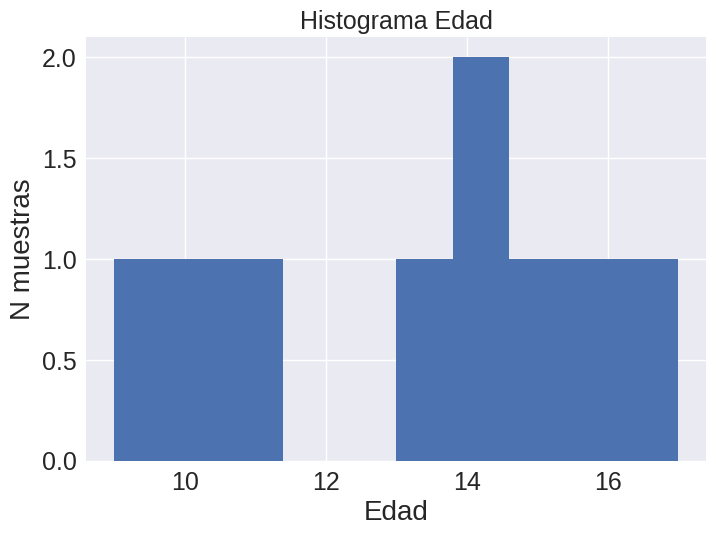

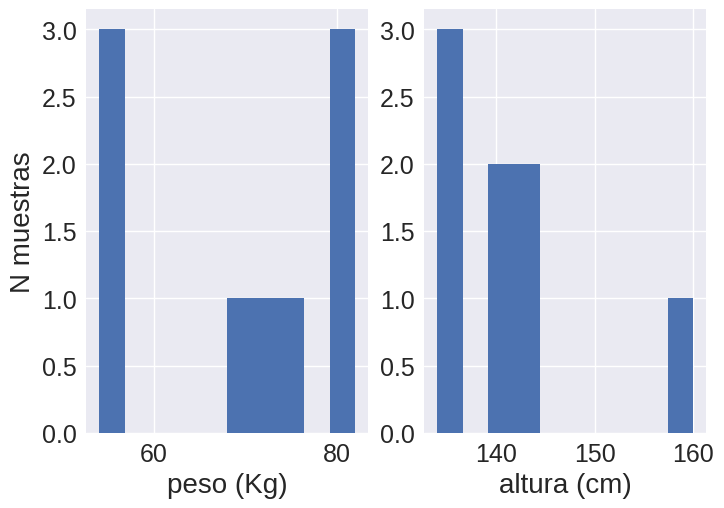

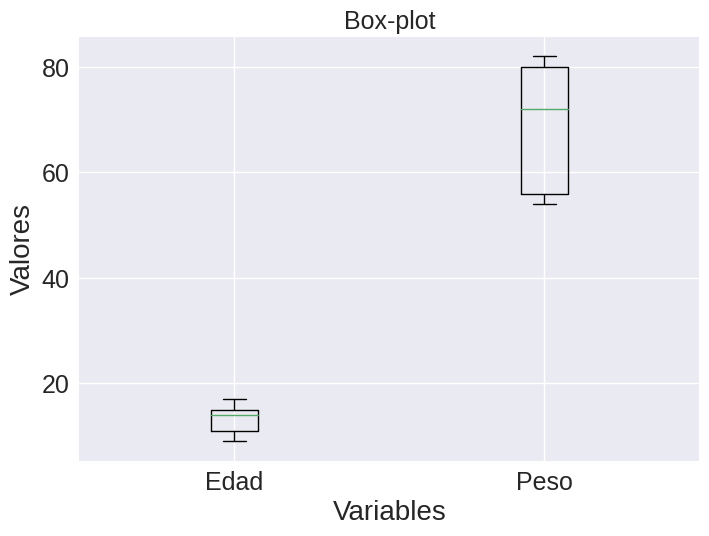

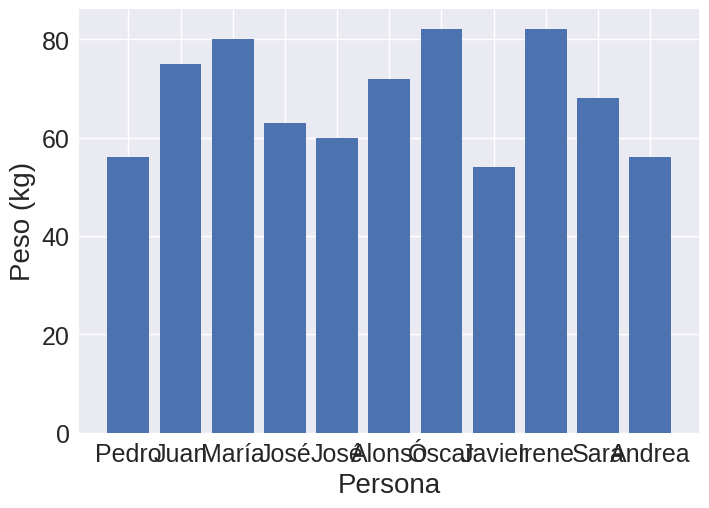

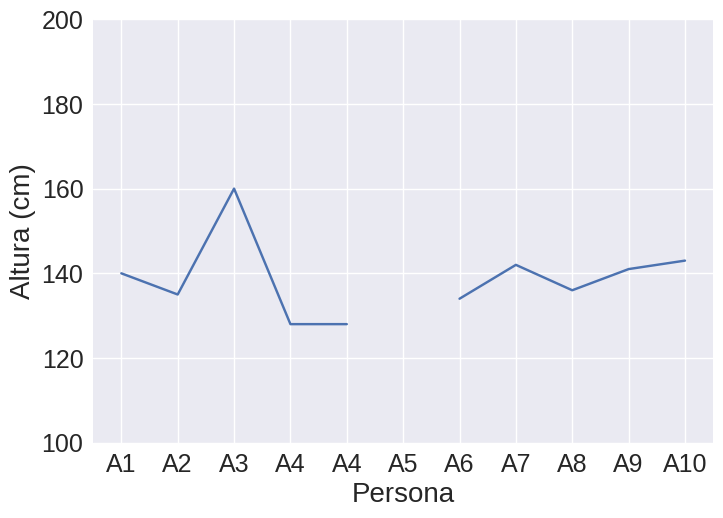

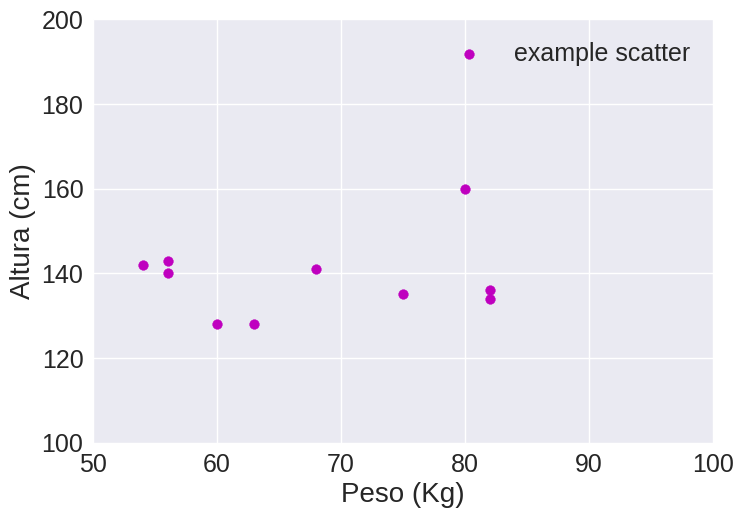

In [ ]:
# Obtener el histograma de la variable edad
plt.figure()
plt.title('Histograma Edad')
plt.hist(df['edad'].values)
plt.xlabel('Edad')
plt.ylabel ('N muestras')
plt.show()

# Obtener en una misma figura dos "subplots" donde en uno se represente la distribución de la variable peso y en la otra la de la variable altura
plt.figure()
plt.subplot(1,2,1)
plt.hist(df['peso'].values)
plt.xlabel('peso (Kg)')
plt.ylabel ('N muestras')
plt.subplot(1,2,2)
plt.hist(df['altura'].values)
plt.xlabel('altura (cm)')
plt.show()

# Obtener las gráficas box-plot que representan de la distribución de la variable 'Edad' y 'Peso' con lo
plt.figure()
plt.title('Box-plot')
plt.boxplot([df['edad'].values,df['peso'].values])
plt.xlabel('Variables')
plt.xticks([1,2],['Edad','Peso'])
plt.ylabel ('Valores')
plt.show()



# Obtener un gráfico de barras en que cada barra represente una persona (eje X) y la altura de la barra (eje Y) sea el peso 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.bar(x_values, df_sin_duplicados['peso'].values)
plt.xlabel('Persona')
plt.ylabel ('Peso (kg)')
plt.xticks(x_values, labels=df_sin_duplicados['nombre'].values)
plt.show()


# Obtener un gráfico de lineas donde cada valor en el eje X represente el identificador de la persona y el eje Y sea la altura. 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.plot(x_values, df_sin_duplicados['altura'].values)
plt.xlabel('Persona')
plt.ylabel ('Altura (cm)')
plt.xticks(x_values, labels=df_sin_duplicados['id'].values)
plt.ylim((100, 200))
plt.show()


# Obtener un gráfico de puntos que relacione el peso con la altura. 
x_values=range(0,len(df_sin_duplicados))

plt.figure()
plt.scatter( df_sin_duplicados['peso'].values, df_sin_duplicados['altura'].values, c='m', label= 'example scatter')
plt.xlabel('Peso (Kg)')
plt.ylabel ('Altura (cm)')
plt.ylim((100, 200))
plt.xlim((50, 100))
plt.legend()
plt.show()

## Ejercicio 1


En esta parte vamos a trabajar con un conjunto de datos relacionado con las características nutricionales de los menús del McDonals (**menu2_.csv**). Este dataset es una adaptación de los datos disponibles en el repositorio Kaggle. 

Adicionalmente, en el dataset **reviews.csv** aparece la información sobre las opiniones de los menus.

Con ambos datasets se pretende llevar a cabo el proceso de limpieza y la preparación de los datos, realizar un análisis estadístico, y finalmente obtener información/conocimiento de los datos.


###**Parte A:** Para realizar la **limpieza y preparación de los datos**, se solicita:

1.	**Con el dataset 'menu.csv'**





1.1.	Cargar el csv 'menu2_.csv'. ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?


In [1]:
import pandas as pd
import numpy as np


In [ ]:
# ## TODO
from google.colab import files
data= files.upload()

Saving menu2_.csv to menu2_.csv


In [ ]:
## Abrimos csv sin añadir ningún argumento
data1= pd.read_csv('menu2_.csv')
data1.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17,3,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17,3,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17,2,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,21.0,6.0,0.0,25.0,10.0,NaN



  1.2.	Indicar de qué tipo es cada variable y de qué tipo de dato toma Python a cada variable


_Respuesta:_

Las primeras dos varibles ("Category" y "Item") son variables cualitativas(categóricas). La variable "Observ" también podría ser cualitativa, pero todas sus valores son "Nan". El resto de las variables son cuantitativas.

In [ ]:
## Controlamos el tipo de datos
print(data1.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                          object
Calories from Fat                float64
Total Fat                        float64
Total Fat (% Daily Value)        float64
Saturated Fat                    float64
Saturated Fat (% Daily Value)    float64
Trans Fat                        float64
Cholesterol                      float64
Cholesterol (% Daily Value)      float64
Sodium                           float64
Sodium (% Daily Value)           float64
Carbohydrates                    float64
Carbohydrates (% Daily Value)    float64
Dietary Fiber                    float64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                          float64
Vitamin A (% Daily Value)        float64
Vitamin C (% Daily Value)        float64
Calcium (% Daily Value)          float64
Iron (% Daily Value)             float64
Observ          

- ¿Hay algún campo que no está considerado correctamente? ¿A qué crees que pueda ser debido?

Respuesta:

Las variables "Serving Size" y "Calories" tienen que ser cuantitativas. Esto se debe al uso de las letras en sus valores.

1.3. ¿Hay alguna instancia duplicada? En caso afirmativo, eliminar las instancias duplicadas para que solo haya filas únicas. 


In [ ]:
## Controlamos los datos duplicados
print("Hay algunas instancias duplicadas en el dataset 'data1': {}".format(data1['Item'].duplicated().any()))

data1 = data1.drop_duplicates()

print("Hay algunas instancias duplicadas en el dataset 'data1': {}".format(data1['Item'].duplicated().any()))

Hay algunas instancias duplicadas en el dataset 'data1': True
Hay algunas instancias duplicadas en el dataset 'data1': False


1.4.	Limpieza de datos numéricos: Eliminar los símbolos o caracteres que imposibilitan que la variable sea tomada como int o float y sea considerada como un objeto o string. Este paso nos permitirá hacer operaciones y agrupaciones con los valores numéricos. En caso contrario no se podrá hacer ninguna operación matemática con las variables.


In [ ]:

import re


In [ ]:
## Limpieza de la columna "Calories"

data1["Calories"] = data1["Calories"].astype(str).apply(lambda c: re.sub("[a-zA-Z\.\n\s )]","",c))



data1["Calories"]  = data1["Calories"] .replace("", "nan")

data1[data1["Calories"] == "nan"]


data1["Calories"] = data1["Calories"].astype(float)


- La variable 'Serving Size' es formato objeto ya que es de tipo cadena de texto. Para poder hacer cálculos sobre la variable que representa esta columna, vamos a quedarnos con el primer valor numérico que aparece y guardarlo en una nueva variable (columna) que se llame 'Serving Size oz'.

In [ ]:
#Creamos una nueva variable (columna) que se llame 'Serving Size oz'.
lst_oz = []

for i in data1["Serving Size"]:
  if "oz" in i:
    lst_oz.append( re.sub(" [a-zA-Z].*","",i))
  else:
    lst_oz.append(np.nan)

data1['Serving Size oz'] = lst_oz
data1['Serving Size oz'] = data1['Serving Size oz'].astype(float)

1.5.	Limpieza de datos categóricos: 
  - Homogeneizar los valores de las variables categóricas que sean cadenas de texto de forma que estén todos en minúscula. Esto permitirá que se podrán cruzar diferentes bases de datos y que no se consideren cadenas distintas por aparecer en un caso en mayúsculas y en el otro en minúsculas. 

In [ ]:
## aplicamos la función lower() para las columnas "Category" y "Item"

data1["Category"] = [i.lower() for i in data1["Category"]]

data1["Item"] = [i.lower() for i in data1["Item"]]


In [ ]:
data1.iloc[:,3:].dtypes

Calories                         float64
Calories from Fat                float64
Total Fat                        float64
Total Fat (% Daily Value)        float64
Saturated Fat                    float64
Saturated Fat (% Daily Value)    float64
Trans Fat                        float64
Cholesterol                      float64
Cholesterol (% Daily Value)      float64
Sodium                           float64
Sodium (% Daily Value)           float64
Carbohydrates                    float64
Carbohydrates (% Daily Value)    float64
Dietary Fiber                    float64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                          float64
Vitamin A (% Daily Value)        float64
Vitamin C (% Daily Value)        float64
Calcium (% Daily Value)          float64
Iron (% Daily Value)             float64
Observ                           float64
Serving Size oz                  float64
dtype: object

In [ ]:
#columnas con valores numéricos

cols_num = [i for i in data1.iloc[:,3:].columns]
cols_num

['Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)',
 'Observ',
 'Serving Size oz']

1.6.	Detectar valores sin sentido y reemplazar por np.nan. Definiremos como valores sin sentido valores negativos. 

In [ ]:
#Detectar valores sin sentido y reemplazar por np.nan

for i in data1.columns:
  if i in cols_num:
  #if data1[i].dtypes != "object":
    data1[data1[i] < 0] = np.nan


1.7. Lidiar con los nan:

- Obtener un mapa de calor (heatmap) en el que se pueda visualizar facilmente los nan que exiten en el dataset. 
- Eliminar filas y columnas con todos los valores a NAN.
- Obtener el porcentaje de registros a NAN que tiene cada categoria. (NOTA: se recomienda evaluar la existencia de NAN en las variables, exceptuanto la variable Categoria. Después, agrupar por categoría y sumar el total de NAN).
- Obtener el porcentaje de NAN que tiene cada varaible.
- Eliminar las categorias y variables (columnas) que tengan más del 60% de nan
- En las variables que tengan menos de 10% de nan, imputar los valores con su mediana calculada con los datos disponibles de la variable (NOTA: se deberá recomputar el porcentaje de nan para cada fila después de haber eliminado las filas y columnas en los dos puntos anteriores).



In [ ]:
import seaborn as sns
#TODO


<Axes: >

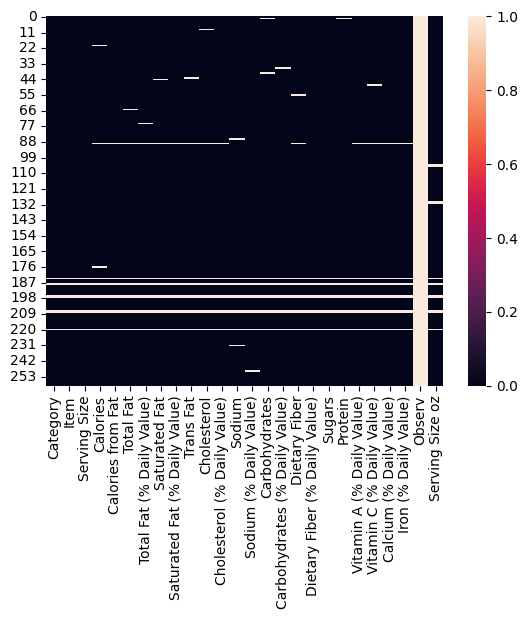

In [ ]:
## mapa de calor (heatmap) en el que se pueda visualizar facilmente los nan que exiten en el dataset
sns.heatmap(data1.isnull())



In [ ]:
#Eliminamos las filas donde todos los valores son "Nan"
data1.isnull()

data1 = data1.dropna(how='all')

In [ ]:
# Calculamos el porcentage de los valores Nan agrupados por la variable "Category"


df_per = data1.groupby("Category").apply(lambda x: (x.isnull().sum().sum()) / (x.notnull().sum().sum()) * 100)

df_per = df_per.to_frame().reset_index()

df_per.rename({0: '%Nan'}, axis=1, inplace=True)

df_per

,Category,%Nan
0,beef & pork,5.121294
1,beverages,4.309064
2,breakfast,4.697987
3,chicken & fish,4.309064
4,coffee & tea,4.094631
5,desserts,5.202312
6,salads,15.555556
7,smoothies & shakes,4.148784
8,snacks & sides,4.000000


In [ ]:
#Añadimos la columna del porcentage de Nan por categoría
data1 = data1.merge(df_per,left_on="Category",right_on="Category")
data1.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ,Serving Size oz,%Nan
0,breakfast,egg mcmuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,...,17.0,3.0,17.0,10.0,0.0,25.0,15.0,NaN,4.8,4.697987
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,17.0,3.0,NaN,6.0,0.0,25.0,8.0,NaN,4.8,4.697987
2,breakfast,sausage mcmuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,...,17.0,2.0,14.0,8.0,0.0,25.0,10.0,NaN,3.9,4.697987
3,breakfast,sausage mcmuffin with egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,...,17.0,2.0,21.0,15.0,0.0,30.0,15.0,NaN,5.7,4.697987
4,breakfast,sausage mcmuffin with egg whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,...,17.0,2.0,21.0,6.0,0.0,25.0,10.0,NaN,5.7,4.697987


In [ ]:
#Porcentage de Nan en cada columna
percent_missing = data1.isnull().sum() * 100 / len(data1)
missing_value_df = pd.DataFrame({'column_name': data1.columns,
                                 'percent_missing': percent_missing})

missing_value_df.reset_index(drop=True,inplace=True)
missing_value_df

,column_name,percent_missing
0,Category,0.000000
1,Item,0.000000
2,Serving Size,0.000000
3,Calories,1.185771
4,Calories from Fat,0.395257
5,Total Fat,0.790514
6,Total Fat (% Daily Value),0.790514
7,Saturated Fat,0.790514
8,Saturated Fat (% Daily Value),0.395257
9,Trans Fat,0.790514


In [ ]:
#Eliminamos las columnas donde el porcenatge de Nan es mayor de 60%


df_to_del = missing_value_df.loc[missing_value_df['percent_missing'] > 60]


lst_del = [i for i in df_to_del.column_name]

data1.drop(lst_del,1,inplace= True)
data1

<ipython-input-132-2b7a67f8caca>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,%Nan
0,breakfast,egg mcmuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,...,4.0,17.0,3.0,17.0,10.0,0.0,25.0,15.0,4.8,4.697987
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,4.0,17.0,3.0,NaN,6.0,0.0,25.0,8.0,4.8,4.697987
2,breakfast,sausage mcmuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,...,4.0,17.0,2.0,14.0,8.0,0.0,25.0,10.0,3.9,4.697987
3,breakfast,sausage mcmuffin with egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,...,4.0,17.0,2.0,21.0,15.0,0.0,30.0,15.0,5.7,4.697987
4,breakfast,sausage mcmuffin with egg whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,...,4.0,17.0,2.0,21.0,6.0,0.0,25.0,10.0,5.7,4.697987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,smoothies & shakes,mcflurry with oreo cookies (small),10.1 oz (285 g),510.0,150.0,17.0,26.0,9.0,44.0,0.5,...,1.0,4.0,64.0,12.0,15.0,0.0,40.0,8.0,10.1,4.148784
249,smoothies & shakes,mcflurry with oreo cookies (medium),13.4 oz (381 g),690.0,200.0,23.0,35.0,12.0,58.0,1.0,...,1.0,5.0,85.0,15.0,20.0,0.0,50.0,10.0,13.4,4.148784
250,smoothies & shakes,mcflurry with oreo cookies (snack),6.7 oz (190 g),340.0,100.0,11.0,17.0,6.0,29.0,0.0,...,1.0,2.0,43.0,8.0,10.0,0.0,25.0,6.0,6.7,4.148784
251,smoothies & shakes,mcflurry with reese's peanut butter cups (medium),14.2 oz (403 g),810.0,290.0,32.0,50.0,15.0,76.0,1.0,...,2.0,9.0,103.0,21.0,20.0,0.0,60.0,6.0,14.2,4.148784


In [ ]:
# Imputamos los datos donde el porcentage de Nan es menor que 10%. Sustituimos "Nan" por la media de los valores por columna

df_to_input = missing_value_df.loc[missing_value_df['percent_missing'] < 10]
lst_inp = [i for i in df_to_input.column_name]



for i in lst_inp:
  if i in cols_num:
    data1[i].fillna((data1[i].mean()), inplace=True)


**2. Con el dataset 'reviews.csv'**

2.1 Cargar datos "reviews.csv". ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# ## TODO
from google.colab import files
data= files.upload()

Saving reviews.csv to reviews.csv


In [ ]:
## Abrimos el csv con separador "|"
data2= pd.read_csv('reviews.csv',sep='|')
data2.head()

,Category,Item,Reviews,Stars
0,breakfast,egg mcmuffin,575,5
1,breakfast,egg white delight,680,0
2,breakfast,sausage mcmuffin,398,5
3,breakfast,sausage mcmuffin with egg,766,2
4,breakfast,sausage mcmuffin with egg whites,6,5


2.2. Agregar al valor de Stars la palabra stars de forma que la variable 'Stars' se convierta en una variable categórica con valores atendiendo a la forma 'X stars'

In [ ]:
# Cambiamos el tipo de la variable "Star" y añadimos " stars" a cada valor de la columna
data2["Stars"] = data2["Stars"].astype(str)

data2["Stars"] = [i+' stars' for i in data2["Stars"]]

data2.head()

,Category,Item,Reviews,Stars
0,breakfast,egg mcmuffin,575,5 stars
1,breakfast,egg white delight,680,0 stars
2,breakfast,sausage mcmuffin,398,5 stars
3,breakfast,sausage mcmuffin with egg,766,2 stars
4,breakfast,sausage mcmuffin with egg whites,6,5 stars


3.	**Unir dataframes resultantes en el punto 1 y 2”**

Juntar los dos dataframes de forma que a cada país le correspondan dos nuevas columnas “Reviews” y “Stars”. 


In [ ]:
## Juntamos los dos dataframes

data_merge = data1.merge(data2, left_on='Item', right_on='Item')
data_merge.head()
data_merge.columns


Index(['Category_x', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size oz',
       '%Nan', 'Category_y', 'Reviews', 'Stars'],
      dtype='object')

- Eliminar columnas que representan los porcentajes de nan y 'Serving Size'

In [ ]:
#Eliminamos las columnas
data_merge = data_merge.drop(['%Nan','Serving Size'],axis=1)

data_merge.dtypes

Category_x                        object
Item                              object
Calories                         float64
Calories from Fat                float64
Total Fat                        float64
Total Fat (% Daily Value)        float64
Saturated Fat                    float64
Saturated Fat (% Daily Value)    float64
Trans Fat                        float64
Cholesterol                      float64
Cholesterol (% Daily Value)      float64
Sodium                           float64
Sodium (% Daily Value)           float64
Carbohydrates                    float64
Carbohydrates (% Daily Value)    float64
Dietary Fiber                    float64
Dietary Fiber (% Daily Value)    float64
Sugars                           float64
Protein                          float64
Vitamin A (% Daily Value)        float64
Vitamin C (% Daily Value)        float64
Calcium (% Daily Value)          float64
Iron (% Daily Value)             float64
Serving Size oz                  float64
Category_y      

### **Parte B.** **Análisis estadístico**:

1.	Obtener las principales métricas estadísticas (media, mediana, desviación estándar, percentil 25, percentil 75, moda, máximo, mínimo) de las variables numéricas.

In [ ]:
## Realizamos el análisis de la estadística discriptiva de las variables numéricas


data_merge_numeric = data_merge.drop(["Category_y","Stars"],axis=1)
data_merge_numeric.describe()


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,Reviews
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.00000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,355.884786,123.461538,13.751660,21.158750,5.457469,27.367521,0.156860,55.110498,18.423077,528.05261,...,1.703613,6.816239,25.675214,13.638889,12.641026,9.383390,19.884615,8.128205,12.737121,540.042735
std,238.267646,131.583231,14.616994,22.513079,5.003058,25.130594,0.384989,91.585296,30.537609,597.62485,...,1.573070,6.332388,25.813737,11.827395,23.442547,27.583326,16.703407,9.031693,6.979195,282.448458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,200.000000,6.250000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2.000000,90.00000,...,0.000000,0.000000,4.000000,3.250000,0.000000,0.000000,6.000000,0.000000,6.550000,290.750000
50%,330.000000,90.000000,10.000000,16.000000,4.500000,22.000000,0.000000,30.000000,11.000000,190.00000,...,1.000000,6.000000,15.000000,12.000000,8.000000,0.000000,15.000000,5.000000,12.000000,588.000000
75%,470.000000,190.000000,21.750000,33.000000,9.000000,44.000000,0.000000,60.000000,20.000000,960.00000,...,3.000000,11.000000,44.000000,19.000000,15.000000,8.000000,30.000000,15.000000,16.000000,778.750000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.00000,...,7.000000,28.000000,123.000000,87.000000,170.000000,240.000000,70.000000,40.000000,32.000000,993.000000


2. Representar distribución de las variables numéricas y realizar el test de normalidad a cada una de ellas para valorar si siguen una distribución normal.

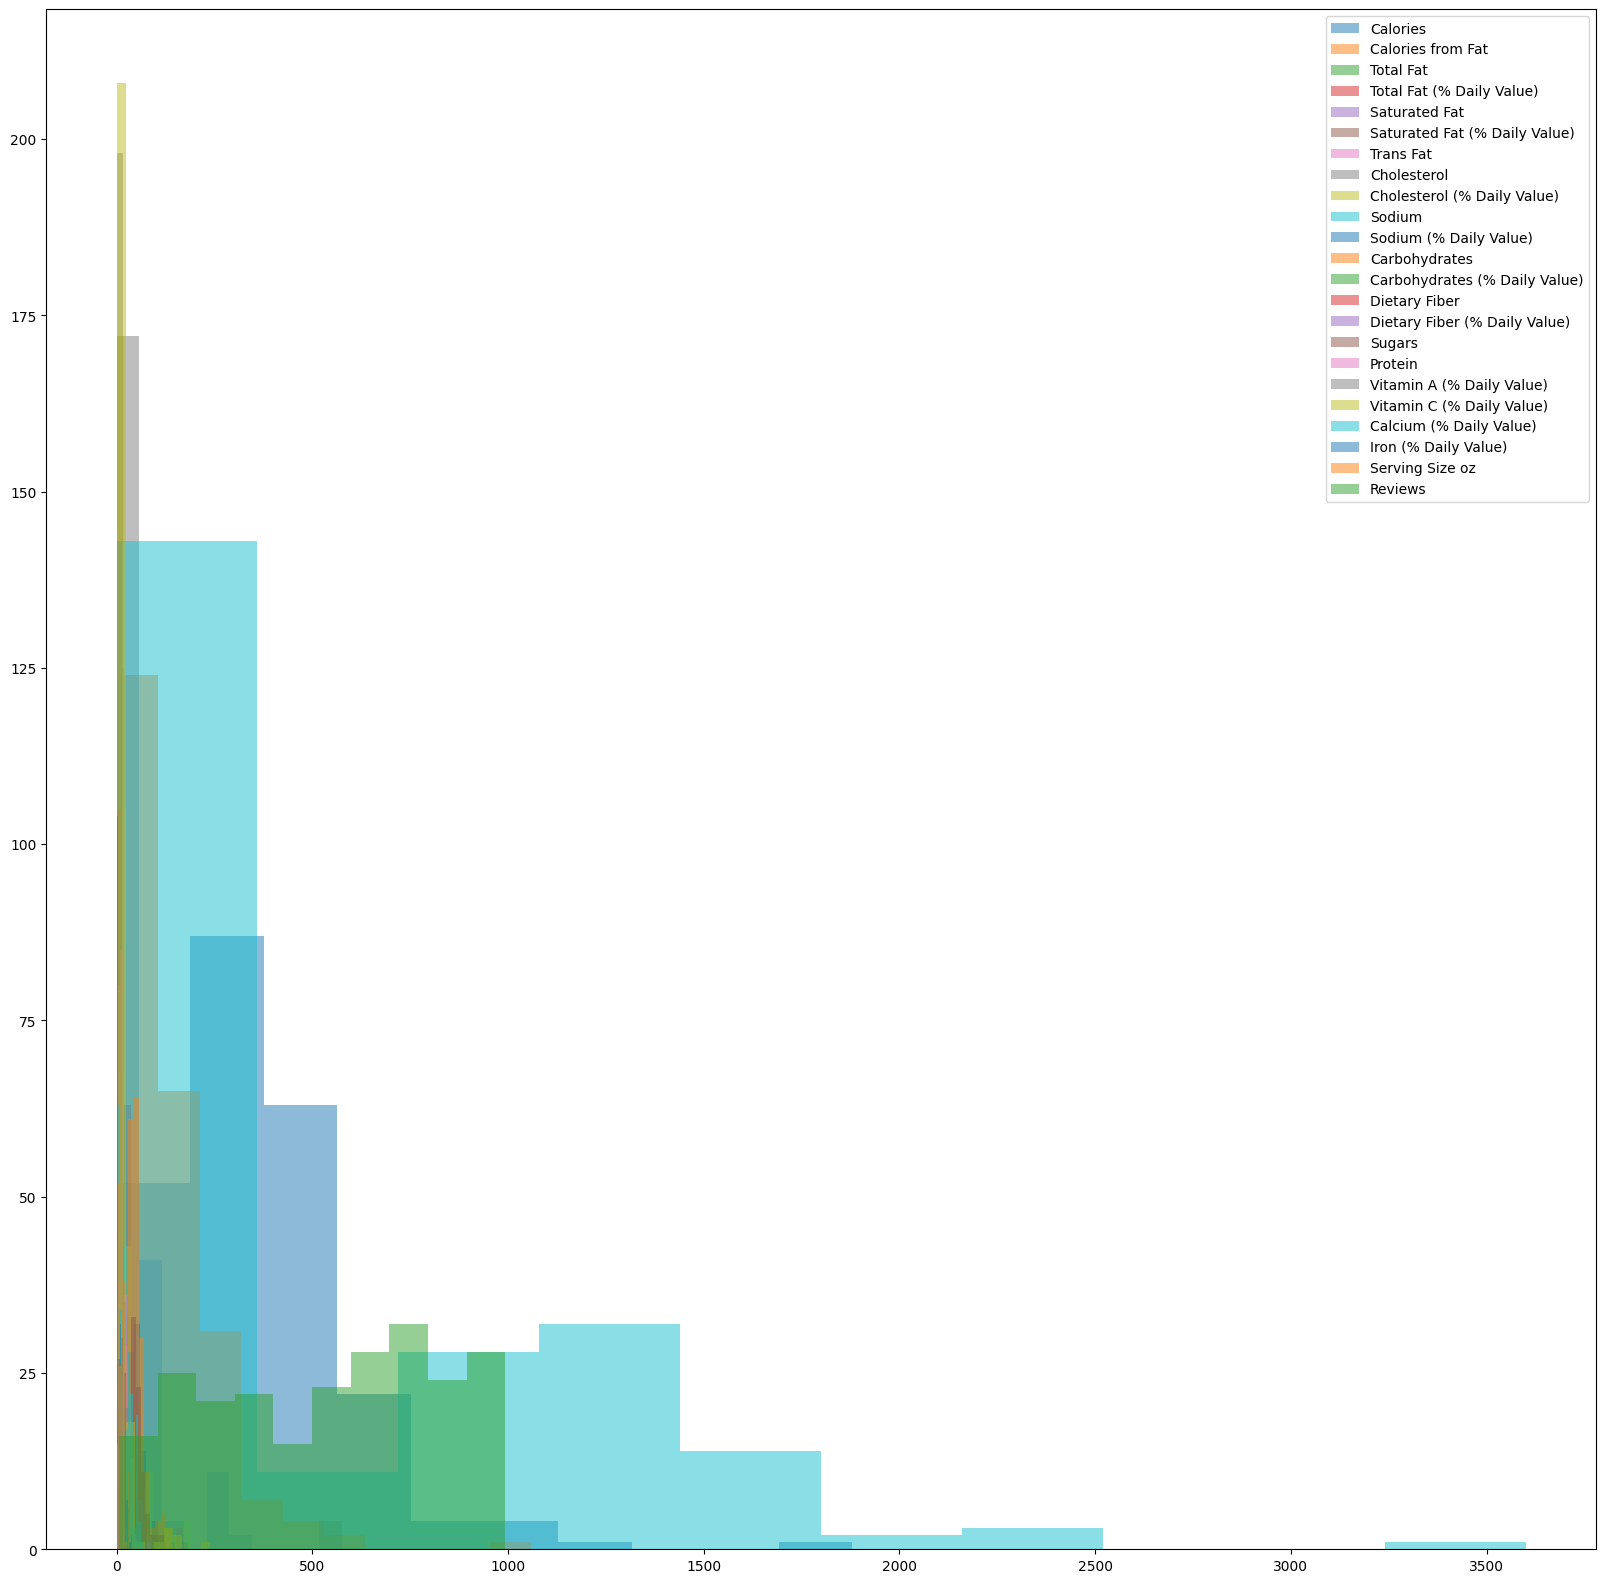

In [ ]:
# Representar distribución de las variables numéricas
## TODO
#data_merge_numeric.hist(bins=30, figsize=(15, 10))
from matplotlib import pyplot

pyplot.figure(figsize=(20,20))

for i in data_merge_numeric.iloc[:,2:].columns:
  pyplot.hist(data_merge_numeric[i],  alpha=0.5, label=i)

pyplot.legend(loc='upper right')

pyplot.show()

In [ ]:
# Test de normalidad de las variables numéricas
## TODO
from scipy import stats

dic_p = {}

for i in data_merge_numeric.iloc[:,2:].columns:
  statistic, p_value = stats.shapiro(data_merge_numeric[i])
  if p_value > 0.05:
     print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos de la columna {} están distribuidos normalmente".format(i))
  else:
     print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos de la columna {} NO están distribuidos normalmente".format(i))

Resultados Test Shapiro (stadístico, p-values):  0.9026922583580017 3.462071254678456e-11  Datos de la columna Calories NO están distribuidos normalmente
Resultados Test Shapiro (stadístico, p-values):  0.8155733346939087 5.972865003662316e-16  Datos de la columna Calories from Fat NO están distribuidos normalmente
Resultados Test Shapiro (stadístico, p-values):  0.8157580494880676 6.086773994409074e-16  Datos de la columna Total Fat NO están distribuidos normalmente
Resultados Test Shapiro (stadístico, p-values):  0.8151683807373047 5.731010098046019e-16  Datos de la columna Total Fat (% Daily Value) NO están distribuidos normalmente
Resultados Test Shapiro (stadístico, p-values):  0.9071579575538635 7.118004796691224e-11  Datos de la columna Saturated Fat NO están distribuidos normalmente
Resultados Test Shapiro (stadístico, p-values):  0.9078264236450195 7.944371549495344e-11  Datos de la columna Saturated Fat (% Daily Value) NO están distribuidos normalmente
Resultados Test Shapiro

3. La distribución de calorias es estadísticamente distinta en las 'Salads' y los 'Desserts'? Y la distribución del azucar? Representar en cada caso (calorías y azúcar) las distribuciones para Salads y Desserts en una misma gráfica para observar mejor las discrepacias (o no).

NOTA: La selección del test dependerá de si las distribuciones son normales o no (resultados del apartado anterior).

In [ ]:
# La distribución de calorias son estadísticamente distintas en las 'Salads' y los 'Desserts'? Y el azucar?
## TODO

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(data_merge_numeric[data_merge_numeric['Category_x']=="salads"]["Calories"],data_merge_numeric[data_merge_numeric['Category_x']=="desserts"]["Calories"])
print('Resultados del test Man Withney U (stadístico, p-values): ', U1, p)

Resultados del test Man Withney U (stadístico, p-values):  19.0 0.8707670479339327


La distribución de calorias  en las 'Salads' y los 'Desserts' son estadísticamente parecidas, ya que el p-value es mayor que 0.05

In [ ]:
U1, p = mannwhitneyu(data_merge_numeric[data_merge_numeric['Category_x']=="salads"]["Sugars"],data_merge_numeric[data_merge_numeric['Category_x']=="desserts"]["Sugars"])
print('Resultados del test Man Withney U (stadístico, p-values): ', U1, p)

Resultados del test Man Withney U (stadístico, p-values):  1.5 0.011389993353969582


La distribución de azucar  en las 'Salads' y los 'Desserts' son estadísticamente distintas, ya que el p-value es menor que 0.05

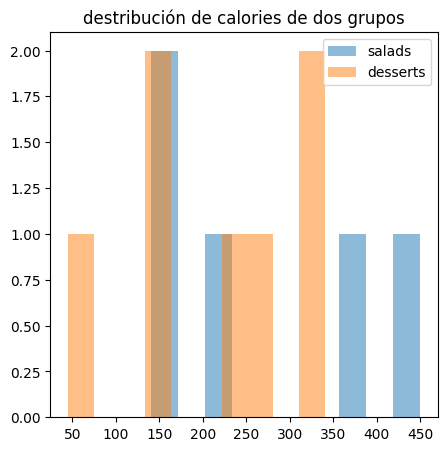

In [ ]:
#Representar ambas distribuciones en un mismo gráfico para poder comparar gráficamente también
## TODO

pyplot.figure(figsize=(5,5))

pyplot.title("destribución de calories de dos grupos")
pyplot.hist(data_merge_numeric[data_merge_numeric['Category_x']=="salads"]["Calories"],  alpha=0.5, label="salads")
pyplot.hist(data_merge_numeric[data_merge_numeric['Category_x']=="desserts"]["Calories"],  alpha=0.5, label="desserts")

pyplot.legend(loc='upper right')

pyplot.show()


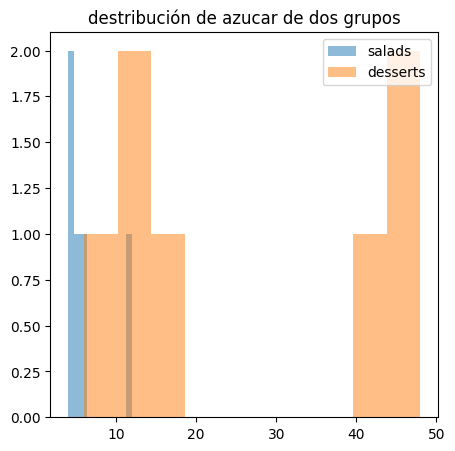

In [ ]:
# La distribución de calorias son estadísticamente distintas en las 'Salads' y los 'Desserts'? Y el azucar?
## #Representar ambas distribuciones en un mismo gráfico para poder comparar gráficamente también
pyplot.figure(figsize=(5,5))

pyplot.title("destribución de azucar de dos grupos")
pyplot.hist(data_merge_numeric[data_merge_numeric['Category_x']=="salads"]["Sugars"],  alpha=0.5, label="salads")
pyplot.hist(data_merge_numeric[data_merge_numeric['Category_x']=="desserts"]["Sugars"],  alpha=0.5, label="desserts")

pyplot.legend(loc='upper right')

pyplot.show()

4. Discretizar la variable calorias en 4 valores mediante el método de los cuartíles. 

In [ ]:
#Discritizar la variable calorias en 4 considerando el método de los cuartiles
## TODO
data_merge_numeric['Calories_Quartiles']=pd.qcut(x = data_merge_numeric['Calories'],
                        q=4, 
                        labels=['low', 'low_med', 'high_med', 'high'])


5. Obtener las tablas de frecuencia de las variables categóricas (incluida la creada en el apartado anterior (calories_cat).

In [ ]:
## TODO
t_freq = pd.DataFrame(data_merge_numeric.value_counts(['Category_x','Item', 'Calories_Quartiles'])) #tabla de frecuencia de las tres variable categóricas


categ_frec = pd.value_counts(data_merge_numeric['Category_x']) #tabla de frecuencia de la variable Category_x
item_frec = pd.value_counts(data_merge_numeric['Item']) #tabla de frecuencia de la variable item
calor_quart = pd.value_counts(data_merge_numeric['Calories_Quartiles']) #tabla de frecuencia de la variable Calories_Quartiles
calor_quart

low         60
low_med     58
high_med    58
high        58
Name: Calories_Quartiles, dtype: int64

6. Obtener el diagrama de frecuencias de las variables categóricas (incluida la variable discretizada).

<Axes: xlabel='Category_x', ylabel='count'>

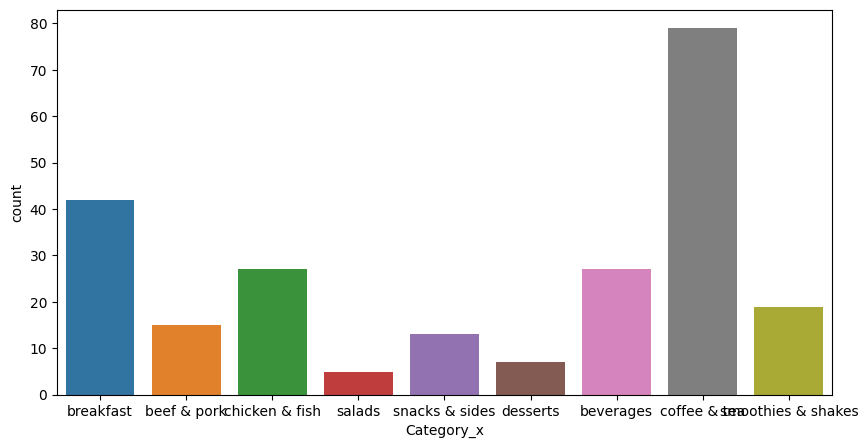

In [ ]:
#diagrama de frecuencias de las variables categóricas (incluida la variable discretizada)
## TODO
pyplot.figure(figsize=(10,5))
ax = sns.countplot(x='Category_x',data=data_merge_numeric)
ax

<Axes: xlabel='Calories_Quartiles', ylabel='count'>

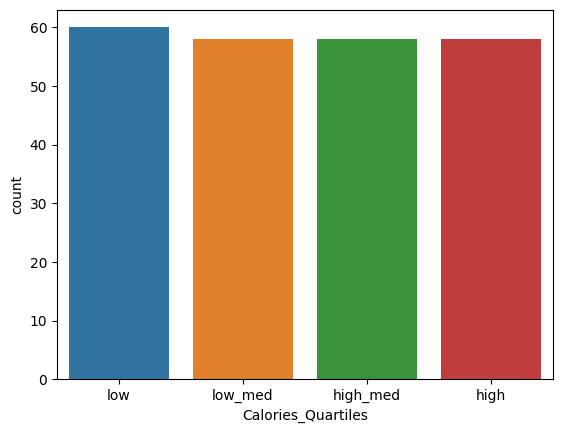

In [ ]:
#diagrama de frecuencias de la variable 'Calories_Quartiles'
ax = sns.countplot(x='Calories_Quartiles',data=data_merge_numeric)
ax

7. Obtener la tabla de contingencia entre 'Category' y la variable discretizada de las calorias. 

In [ ]:
#Tabla de contingencia 'Categories' y discretización 'Calories'.
## TODO
pd.crosstab(data_merge_numeric['Category_x'], data_merge_numeric['Calories_Quartiles'])

Calories_Quartiles,low,low_med,high_med,high
Category_x,,,,
beef & pork,0,2,5,8
beverages,23,4,0,0
breakfast,1,5,16,20
chicken & fish,1,1,10,15
coffee & tea,26,30,19,4
desserts,3,3,1,0
salads,2,1,2,0
smoothies & shakes,0,7,2,10
snacks & sides,4,5,3,1


8. La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?



NOTA: La selección del test dependerá de si las distribuciones son normales o no.

In [ ]:
from scipy import stats

#test de normalidad de la variable "Sugars" para la categoría 'beef & pork'

statistic, p_value = stats.shapiro(data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Sugars"])
if p_value > 0.05:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value,"  distribuidos normalmente")
else:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos  NO están distribuidos normalmente")

Resultados Test Shapiro (stadístico, p-values):  0.9048638343811035 0.112958624958992   distribuidos normalmente


In [ ]:
#test de normalidad de la variable "Sugars" para la categoría 'chicken & fish'
statistic, p_value = stats.shapiro(data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Sugars"])
if p_value > 0.05:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value,"  distribuidos normalmente")
else:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos  NO están distribuidos normalmente")


Resultados Test Shapiro (stadístico, p-values):  0.9517025351524353 0.23572635650634766   distribuidos normalmente


El p-value de ambas variables supera 0.05, por tanto, los valores de ambas variables están distribuidos normalmente.

In [ ]:
# La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?
## TODO

grupo1 = data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Sugars"]
grupo2 = data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Sugars"]

stat, p = stats.levene(grupo1,grupo2)
print('Resultados T-Test (stadístico, p-values): ', stat, p)
if p > 0.05:
  print("La distribución de azucar en 'Beef&Pork' y 'Chicken and fish' es estadísticamente parecida")
else:
  print("La diferencia de azucar entre los ítems de 'Beef&Pork' y 'Chicken and fish' es estadísticamente distinta")

Resultados T-Test (stadístico, p-values):  5.022069641981362 0.030644747705133573
La diferencia de azucar entre los ítems de 'Beef&Pork' y 'Chicken and fish' es estadísticamente distinta


9. La diferencia de calorías entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?

In [ ]:
# La diferencia de calorias entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?
## TODO

#test de normalidad de la variable "Calories" para la categoría 'beef & pork'

statistic, p_value = stats.shapiro(data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Calories"])
if p_value > 0.05:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value,"  distribuidos normalmente")
else:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos  NO están distribuidos normalmente")

Resultados Test Shapiro (stadístico, p-values):  0.971481442451477 0.8793578743934631   distribuidos normalmente


In [ ]:
#test de normalidad de la variable "Calories" para la categoría 'chicken & fish'
statistic, p_value = stats.shapiro(data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Calories"])
if p_value > 0.05:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value,"  distribuidos normalmente")
else:
  print('Resultados Test Shapiro (stadístico, p-values): ', statistic, p_value," Datos  NO están distribuidos normalmente")

Resultados Test Shapiro (stadístico, p-values):  0.6641229391098022 1.276180455533904e-06  Datos  NO están distribuidos normalmente


In [ ]:
from scipy.stats import mannwhitneyu

grupo1 = data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Calories"]
grupo2 = data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Calories"]

U1, p = mannwhitneyu(grupo1,grupo2)
print('Resultados del test Man Withney U (stadístico, p-values): ', U1, p)

if p > 0.05:
  print("La distribución de calorías en 'Beef&Pork' y 'Chicken and fish' es estadísticamente parecida")
else:
  print("La diferencia de calorías entre los ítems de 'Beef&Pork' y 'Chicken and fish' es estadísticamente distinta")

Resultados del test Man Withney U (stadístico, p-values):  211.0 0.8334482617987502
La distribución de calorías en 'Beef&Pork' y 'Chicken and fish' es estadísticamente parecida


10. El factor categoría afecta en el valor de las calorias? Aplicar el test correspondiente. Después obtener el gráfico box-plot en el que se adviertan como se distribuyen los valores de calorías por category. 

In [ ]:
## TODO (El factor categoría afecta en el valor de las calorias. Y al azucar?)

## TODO

# Subset data
data_merge_numeric['Category_x'] = data_merge_numeric['Category_x'].astype("category")


grupo1 = data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Calories"]
grupo2 = data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Calories"]
stat, p = stats.kruskal(grupo1,grupo2)
print('Resultados del test ' , U1,'  ', p)
if p > 0.05:
  print("El factor categoría NO afecta  el valor de las calorias")
else:
  print("El factor categoría  afecta  el valor de las calorias")


Resultados del test  211.0    0.823205759722343
El factor categoría NO afecta  el valor de las calorias


In [ ]:
grupo1 = data_merge_numeric[data_merge_numeric['Category_x']=='chicken & fish']["Sugars"]
grupo2 = data_merge_numeric[data_merge_numeric['Category_x']=='beef & pork']["Sugars"]
stat, p = stats.ttest_ind(grupo1,grupo2)
print('Resultados del test ' , U1,'  ', p)
if p > 0.05:
  print("El factor categoría NO afecta  el valor de los azucar")
else:
  print("El factor categoría  afecta  el valor de los azucar")

Resultados del test  211.0    0.25132685732040866
El factor categoría NO afecta  el valor de los azucar


['breakfast', 'beef & pork', 'chicken & fish', 'salads', 'snacks & sides', 'desserts', 'beverages', 'coffee & tea', 'smoothies & shakes']
Categories (9, object): ['beef & pork', 'beverages', 'breakfast', 'chicken & fish', ..., 'desserts',
                         'salads', 'smoothies & shakes', 'snacks & sides']

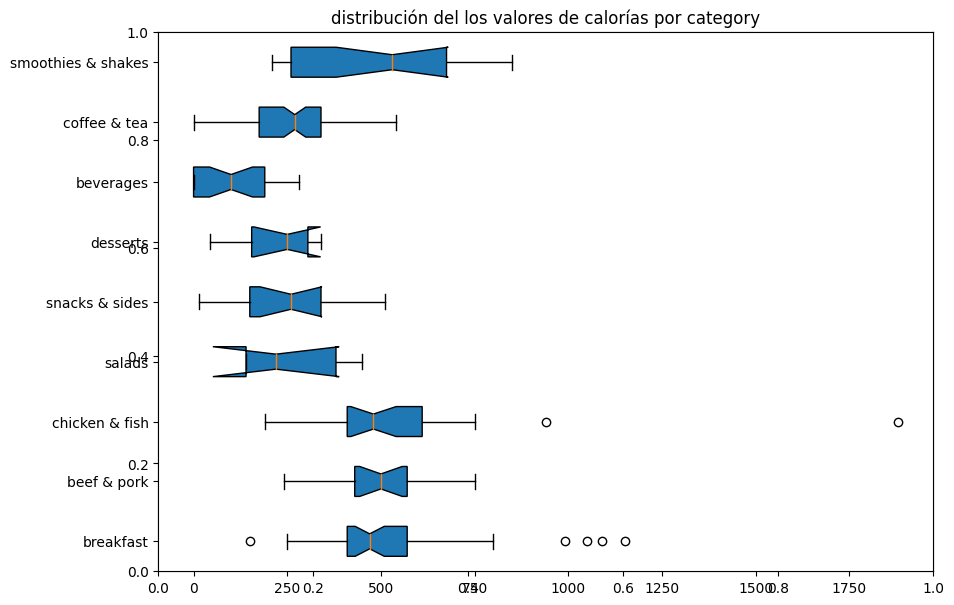

In [ ]:
#Box-plots
import matplotlib.pyplot as plt

lst_box = []

for i in data_merge_numeric["Category_x"].unique():
  lst_box.append(data_merge_numeric[data_merge_numeric["Category_x"] == i].sort_values('Category_x')['Calories'])
fig = plt.figure(figsize =(10, 7))
plt.title("distribución del los valores de calorías por category")
ax = fig.add_subplot(111)
bp = ax.boxplot(lst_box, patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['breakfast', 'beef & pork', 'chicken & fish', 'salads', 'snacks & sides', 'desserts', 'beverages', 'coffee & tea', 'smoothies & shakes'])


data_merge_numeric["Category_x"].unique()

['breakfast', 'beef & pork', 'chicken & fish', 'salads', 'snacks & sides', 'desserts', 'beverages', 'coffee & tea', 'smoothies & shakes']
Categories (9, object): ['beef & pork', 'beverages', 'breakfast', 'chicken & fish', ..., 'desserts',
                         'salads', 'smoothies & shakes', 'snacks & sides']

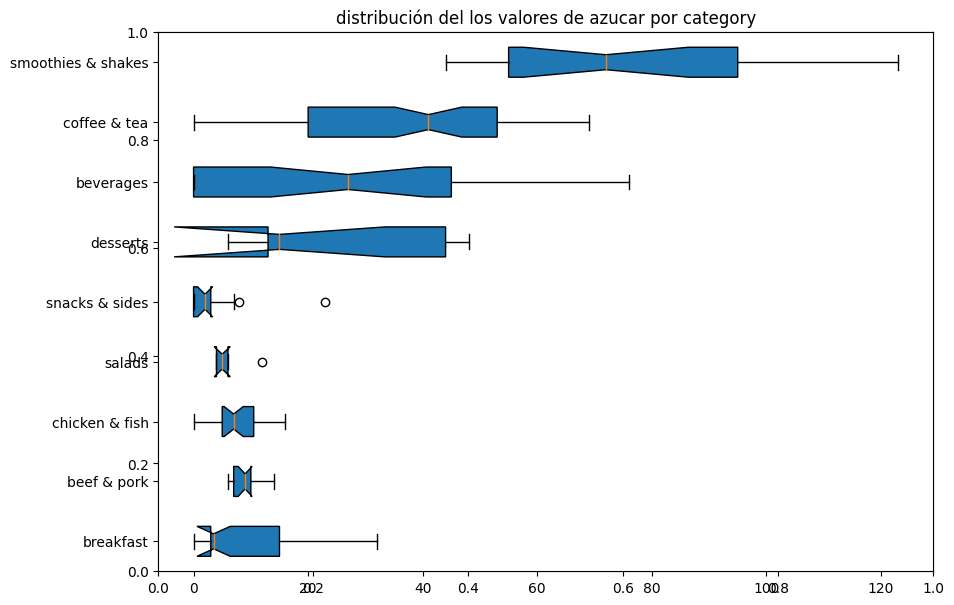

In [ ]:
lst_box = []

for i in data_merge_numeric["Category_x"].unique():
  lst_box.append(data_merge_numeric[data_merge_numeric["Category_x"] == i].sort_values('Category_x')['Sugars'])
fig = plt.figure(figsize =(10, 7))
plt.title("distribución del los valores de azucar por category")
ax = fig.add_subplot(111)
bp = ax.boxplot(lst_box, patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['breakfast', 'beef & pork', 'chicken & fish', 'salads', 'snacks & sides', 'desserts', 'beverages', 'coffee & tea', 'smoothies & shakes'])


data_merge_numeric["Category_x"].unique()

###**Parte C.** Obtener **información y visualizaciones:**

1.	¿Cuantas calorias supone comer la opción con menos calorias de la categoría 'Salad' y de la categoría 'Desserts'? De qué items estaríamos hablando?

In [ ]:
## TODO
df_salad = data_merge_numeric[data_merge_numeric['Category_x']=='salads'][["Item","Calories"]]
[i for i in df_salad[df_salad["Calories"] == df_salad["Calories"].min()]["Item"]]

print('Estaríamos consumiendo las siguientes calorias: ',df_salad["Calories"].min()) 
print('Estaríamos comiendo una de estas opciones para la ensalada: ',[i for i in df_salad[df_salad["Calories"] == 140]["Item"]])

Estaríamos consumiendo las siguientes calorias:  140.0
Estaríamos comiendo una de estas opciones para la ensalada:  ['premium bacon ranch salad (without chicken)', 'premium southwest salad (without chicken)']


In [ ]:
df_dessert = data_merge_numeric[data_merge_numeric['Category_x']=='desserts'][["Item","Calories"]]
[i for i in df_dessert[df_dessert["Calories"] == df_dessert["Calories"].min()]["Item"]]

print('Estaríamos consumiendo las siguientes calorias: ', df_dessert["Calories"].min())
print('Estaríamos comiendo una de estas opciones para los postres: ',[i for i in df_dessert[df_dessert["Calories"] == df_dessert["Calories"].min()]["Item"]])

Estaríamos consumiendo las siguientes calorias:  45.0
Estaríamos comiendo una de estas opciones para los postres:  ['kids ice cream cone']


2. Cuáles son los 10 ítems con más azucar? Representa en un diagrama de barras la cantidad de azucar de estos 10 items, ordenadas de mayor a menor.

In [ ]:
## 10 ítems con más azucar

df_sugar_top10 = data_merge_numeric.sort_values(by='Sugars',ascending=False)[['Item','Sugars']].reset_index(drop=True).head(10)
df_sugar_top10

,Item,Sugars
0,strawberry shake (large),123.0
1,chocolate shake (large),120.0
2,vanilla shake (large),101.0
3,strawberry shake (medium),100.0
4,chocolate shake (medium),97.0
5,shamrock shake (medium),93.0
6,vanilla shake (medium),81.0
7,strawberry shake (small),79.0
8,chocolate shake (small),77.0
9,coca-cola classic (large),76.0


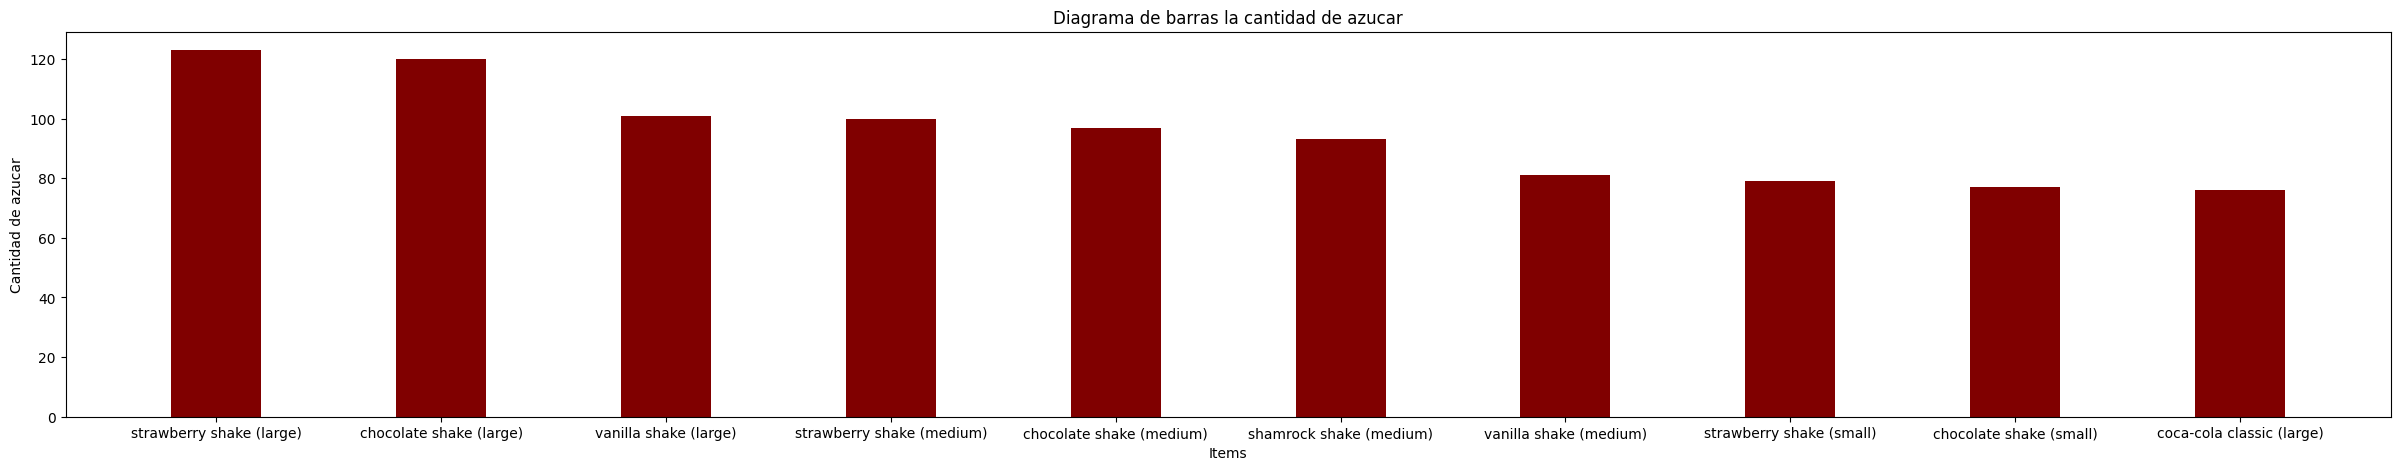

In [ ]:

## diagrama de barras la cantidad de azucar de estos 10 items, ordenadas de mayor a menor.
plt.figure(figsize = (30, 5))

plt.bar(df_sugar_top10.Item, df_sugar_top10.Sugars, color ='maroon',
        width = 0.4)
 
plt.xlabel("Items")
plt.ylabel("Cantidad de azucar")
plt.title("Diagrama de barras la cantidad de azucar")

plt.show()

3. Que categoría presenta en media más estrellas (stars)? Representa en un mismo gráfico: 1) diagrama de barras del número medio de reviews por categoria; 2) plot lineas con el número médio de estrellas. Se solicita que se use un gráfico de dos ejes, uno para cada variable indicada.
NOTA: Previamente a la visualización, se deberá convertir en variable numérica las 'Stars', eliminando el texto.

NOTA: Ayuda para le plot: https://www.analyticslane.com/2022/08/04/uso-de-multiples-ejes-en-matplotlib/


In [ ]:
# Convertimos en variable numérica las 'Stars', eliminando el texto
lst_star = []

for i in data_merge["Stars"]:
  lst_star.append(re.sub("[a-zA-Z \n\s]","",i))

lst_star = [int(i) for i in lst_star]

data_merge["Stars"] = lst_star

data_merge.head()

,Category_x,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,Category_y,Reviews,Stars
0,breakfast,egg mcmuffin,300.0,120.0,13.0,20.0,5.0,25.0,0.0,260.0,...,3.0,17.0,10.0,0.0,25.0,15.0,4.8,breakfast,575,5
1,breakfast,egg white delight,250.0,70.0,8.0,12.0,3.0,15.0,0.0,25.0,...,3.0,13.5,6.0,0.0,25.0,8.0,4.8,breakfast,680,0
2,breakfast,sausage mcmuffin,370.0,200.0,23.0,35.0,8.0,42.0,0.0,45.0,...,2.0,14.0,8.0,0.0,25.0,10.0,3.9,breakfast,398,5
3,breakfast,sausage mcmuffin with egg,450.0,250.0,28.0,43.0,10.0,52.0,0.0,285.0,...,2.0,21.0,15.0,0.0,30.0,15.0,5.7,breakfast,766,2
4,breakfast,sausage mcmuffin with egg whites,400.0,210.0,23.0,35.0,8.0,42.0,0.0,50.0,...,2.0,21.0,6.0,0.0,25.0,10.0,5.7,breakfast,6,5


In [ ]:
df_star_mean = pd.DataFrame(data_merge.groupby('Category_x')['Stars'].mean().reset_index())
df_star_mean

,Category_x,Stars
0,beef & pork,2.000000
1,beverages,3.074074
2,breakfast,2.452381
3,chicken & fish,2.777778
4,coffee & tea,2.506329
5,desserts,2.857143
6,salads,2.600000
7,smoothies & shakes,2.526316
8,snacks & sides,2.769231


In [ ]:
df_review_mean = pd.DataFrame(data_merge.groupby('Category_x')['Reviews'].mean().reset_index())
df_review_mean

,Category_x,Reviews
0,beef & pork,415.400000
1,beverages,566.592593
2,breakfast,518.785714
3,chicken & fish,528.481481
4,coffee & tea,584.962025
5,desserts,547.428571
6,salads,652.400000
7,smoothies & shakes,447.947368
8,snacks & sides,535.846154


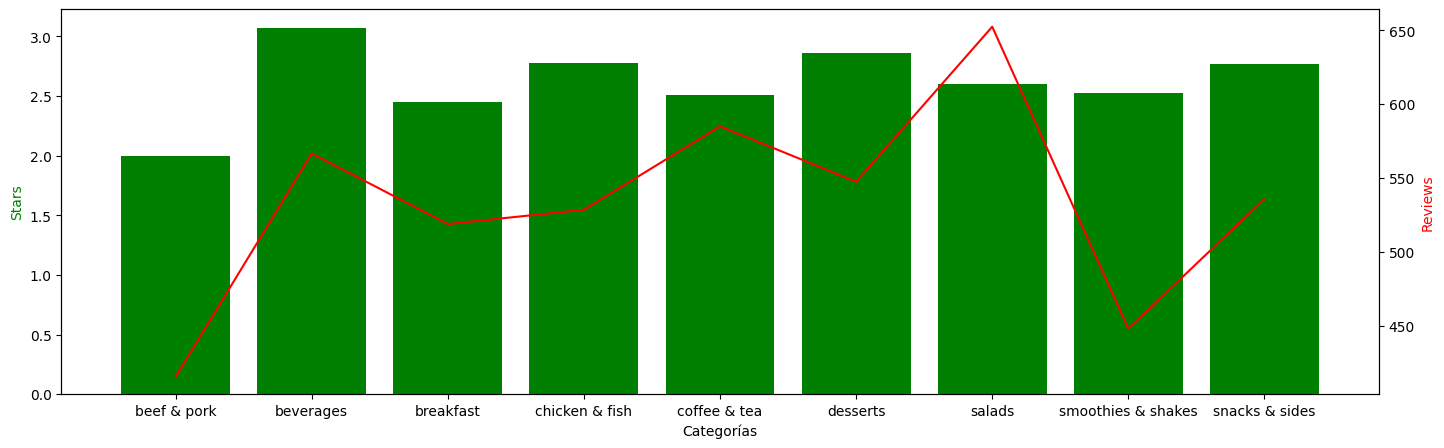

In [ ]:
## diagrama de barras del número medio de reviews por categoria y el plot lineas con el número médio de estrellas.

fig, axes = plt.subplots(figsize=(17, 5))
axes.bar(df_star_mean.Category_x, df_star_mean.Stars, color='g')
axes.set_xlabel('Categorías')
axes.set_ylabel('Stars', color='g')
twin_axes = axes.twinx() 
twin_axes.plot(df_review_mean.Category_x, df_review_mean.Reviews, 'r')
twin_axes.set_ylabel('Reviews', color='r')
plt.show()


4. Crea un dataframe que muestre para cada categoria una columna con el ítem con más proteina y el ítem con menos proteina. Este dataframe tendrà tres columnas: [Categoría, item_max_prot, item_min_prot]

In [ ]:
## El dataframe que muestra para cada categoria una columna con el ítem con más proteina y el ítem con menos proteina.

df_max_pro = pd.DataFrame(data_merge.groupby('Category_x')[['Item','Protein']].max().reset_index())

df_min_pro = pd.DataFrame(data_merge.groupby('Category_x')[['Item','Protein']].min().reset_index())

df_merge_pro = df_max_pro.merge(df_min_pro,left_on='Category_x',right_on='Category_x')
df_merge_pro

df_merge_pro.rename(columns={"Category_x":"Categoría",	"Item_x": "item_max_prot", "Item_y": "item_min_prot"},inplace=True)

df_merge_pro.drop(["Protein_x","Protein_y"],axis=1,inplace=True)
df_merge_pro

,Categoría,item_max_prot,item_min_prot
0,beef & pork,quarter pounder with cheese,bacon clubhouse burger
1,beverages,sprite (small),1% low fat milk jug
2,breakfast,"steak, egg & cheese bagel","bacon, egg & cheese bagel"
3,chicken & fish,southern style crispy chicken sandwich,bacon buffalo ranch mcchicken
4,coffee & tea,sweet tea (small),caramel iced coffee (large)
5,desserts,strawberry sundae,baked apple pie
6,salads,premium southwest salad with crispy chicken,premium bacon ranch salad (without chicken)
7,smoothies & shakes,vanilla shake (small),blueberry pomegranate smoothie (large)
8,snacks & sides,small french fries,apple slices


5. Crea un grafico tipo scatterplot para representar la relación entre sugar vs Carbohidrates. Adviertes alguna tendencia? Cómo interpretas el gráfico.
Repite el mismo gráfico pero diferenciando por colores los valores correspondientes a cada categoria. Cómo interpretas el gráfico?
 

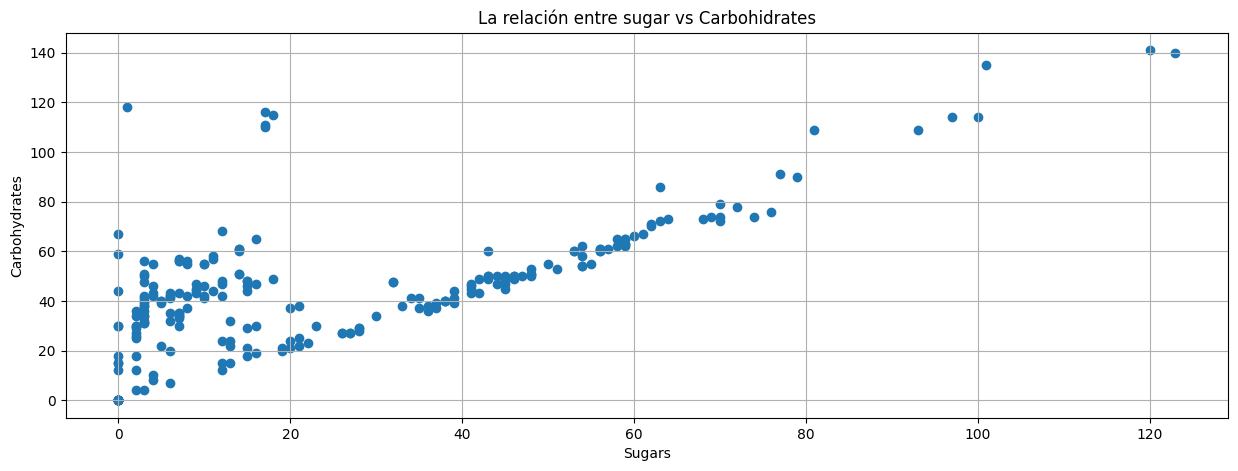

In [ ]:
plt.figure(figsize=(15,5))


plt.scatter(data_merge['Sugars'],data_merge['Carbohydrates'])
plt.title("La relación entre sugar vs Carbohidrates")
plt.xlabel("Sugars")
plt.ylabel("Carbohydrates")

plt.grid(True)
plt.show()


Interpretación:

Podemos observar una fuerte relación lineal entre las dos variables. En muchos casos, a medida que crece el valor del azucar, crece tambien los carbohidratos.

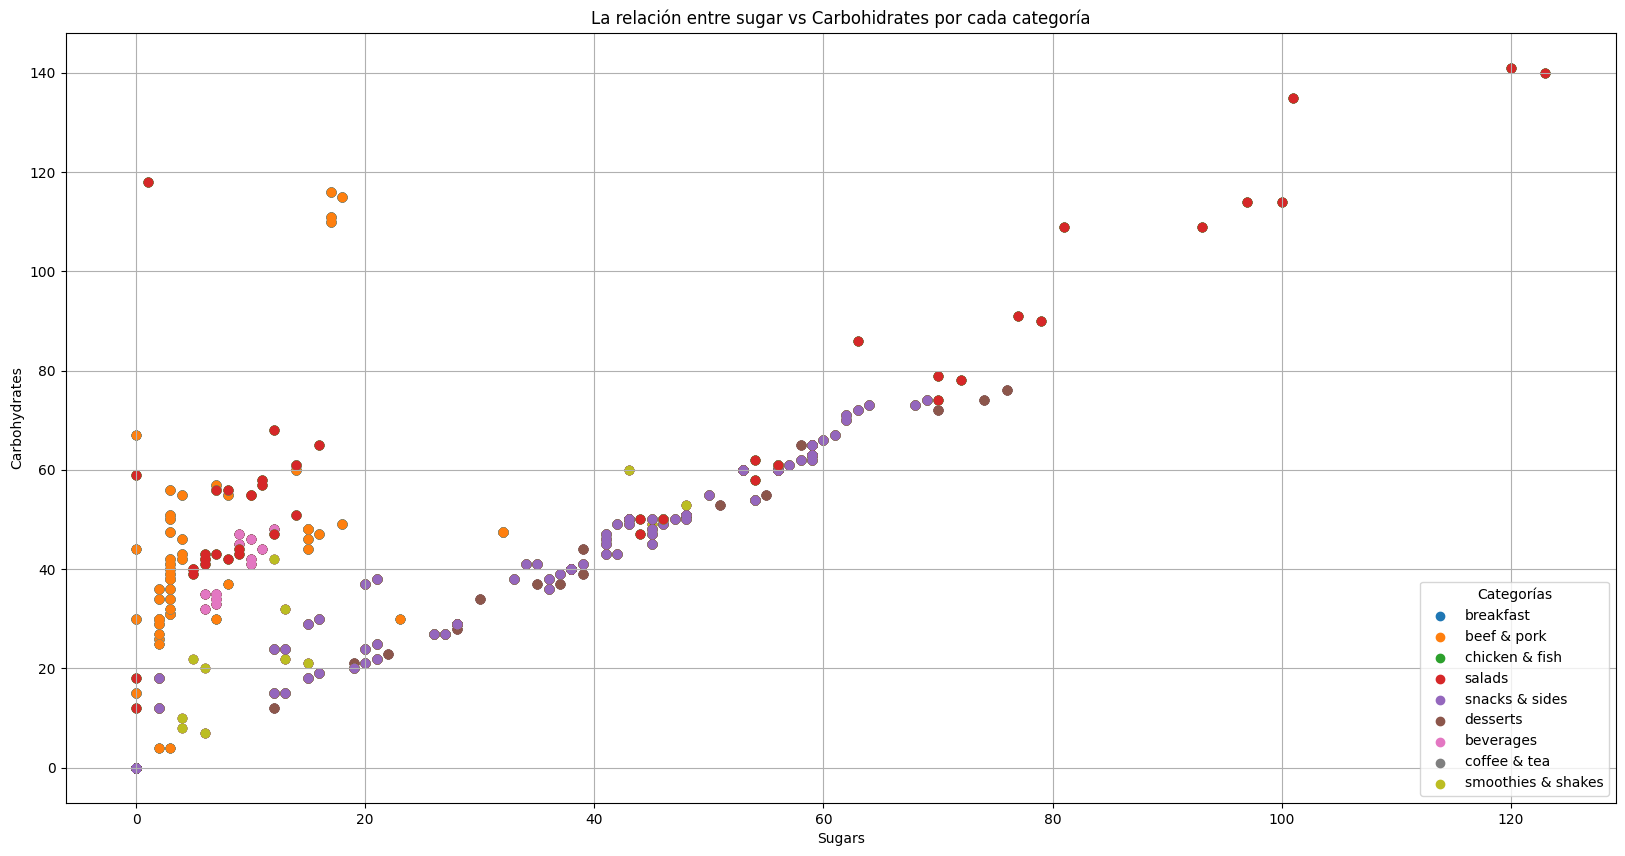

In [ ]:
## TODO
plt.figure(figsize=(20,10))

for i in data_merge["Category_x"]:
  plt.scatter(data_merge[data_merge["Category_x"]==i]['Sugars'],data_merge[data_merge["Category_x"]==i]['Carbohydrates'])
plt.title("La relación entre sugar vs Carbohidrates por cada categoría")
plt.xlabel("Sugars")
plt.ylabel("Carbohydrates")
plt.legend([i for i in data_merge["Category_x"].unique()],loc="lower right", title="Categorías")
plt.grid(True)
plt.show()



_Interpretación:_

Descriminando los datos por categoría, podemos notar que las insaladas y las carnes pueden tener un nivel bastante alto de carbohidrates sin aumentar el azucar. Mientras que en los postres y snacks prevale el azucar.

6. Repite el mismo gráfico que en el punto anterior pero para las variables Serving Size oz y calorias. Adviertes alguna relación? Cómo interpretas los gráficos. 

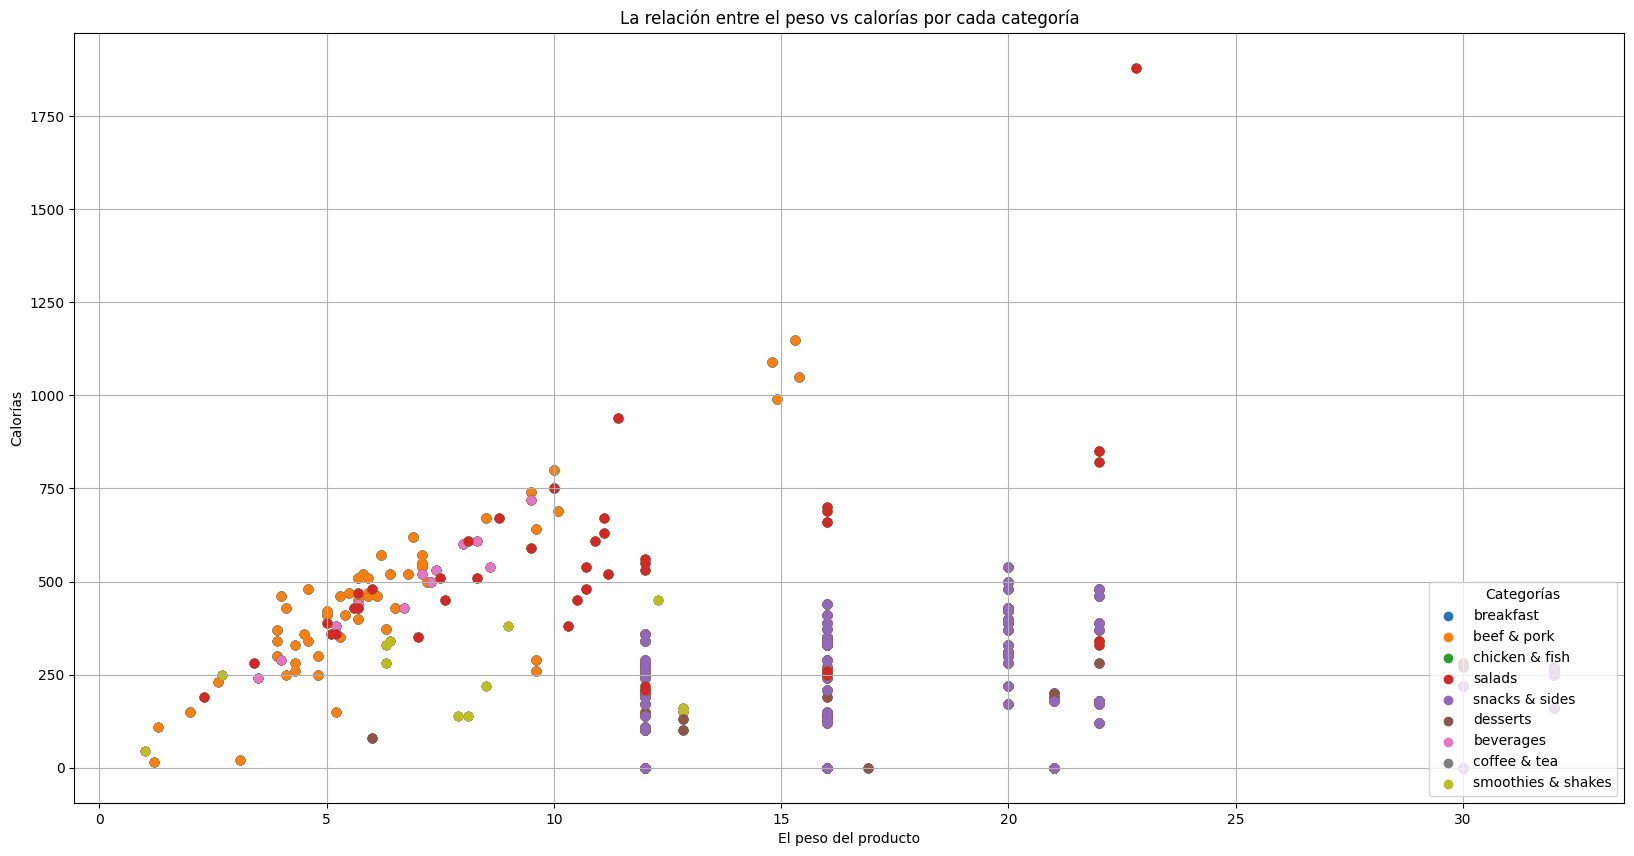

In [ ]:
## TODO

plt.figure(figsize=(20,10))

for i in data_merge["Category_x"]:
  plt.scatter(data_merge[data_merge["Category_x"]==i]['Serving Size oz'],data_merge[data_merge["Category_x"]==i]['Calories'])
plt.title("La relación entre el peso vs calorías por cada categoría")
plt.xlabel("El peso del producto")
plt.ylabel("Calorías")
plt.legend([i for i in data_merge["Category_x"].unique()],loc="lower right", title="Categorías")
plt.grid(True)
plt.show()



_Interpretación:_

En este gráfica podemos también observar una relación lineal entre las dos variables. Sobre todo, esta relación se nota en las categorías de las insaladas y las carnes. 

En el caso de los snacks, podemos observar que los productos de esta categoría pueden mantener el mismo peso, aumentando signíficamente la cantidad de las calorías.

## Ejercicio 2


En esta parte vamos a trabajar con datos registrado de un portal de empleo para las ofertas relacionadas con Ciencia de Datos. Es una adaptación del dataset disponible en Kaggle. .


Con este dataset, además de limpiar y preparar los datos, plantearemos qué tipo de problema (regresión o clasificación) podríamos resolver con este dataset preparado. 


### **Parte A.** Para realizar la **limpieza y preparación de los datos**, se solicita:

1.	Cargar el fichero 'Naukri Jobs Data.csv'


In [ ]:
# subir todos los archivos de la PEC a colab
from google.colab import files
data= files.upload()

Saving Naukri Jobs Data.csv to Naukri Jobs Data.csv


In [ ]:
#TODO

import pandas as pd
data = pd.read_csv("Naukri Jobs Data.csv")

data.head()

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022
0,Information Technology Executive,Marriott,4.2,(2907 Reviews),0-3 Yrs,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO
1,Associate Director-Information Technology(SAP),Unacademy,3.4,(544 Reviews),5-15 Yrs,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO
2,Lead - Information Technology,EchoIndia,4.0,(20 Reviews),11-13 Yrs,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO
3,Information Technology - Project Manager,Tata International,4.1,(287 Reviews),4-8 Yrs,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO
4,Information Technology Trainee,Stefanini,3.8,(75 Reviews),2-7 Yrs,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO


2. Tratamiento de los nans:
- Obtener el mapa de color para valorar visualmente donde tenemos nansMapa de calor
- Eliminar todas las filas que tengan almenos una variable a nan. Volver a obtener el mapa de calor para ombservar si en efecto se han eliminado todos los nans.

In [ ]:
data.isnull().any()#TODO
data.isna().sum()



job_post                    0
company                     0
company_rating              0
company_review              0
exp_required                0
salary_offered              0
job_location                0
job_description             0
required_skills             0
Posted_as_on_22_5_2022    186
dtype: int64

<Axes: >

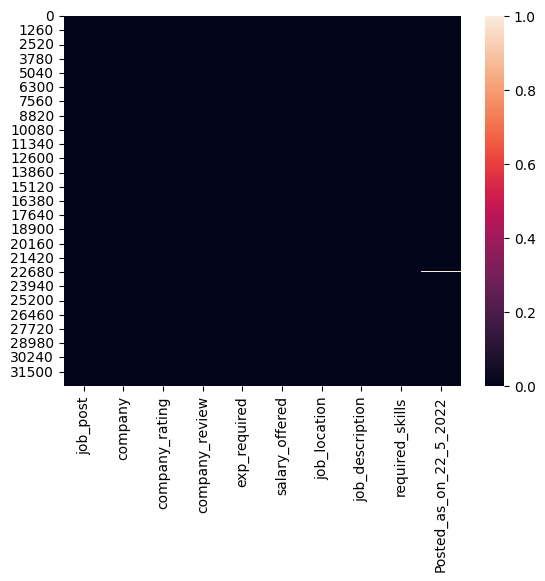

In [ ]:
#la mapa de calor antes de eliminar los Nans
import seaborn as sns

sns.heatmap(data.isna())

<Axes: >

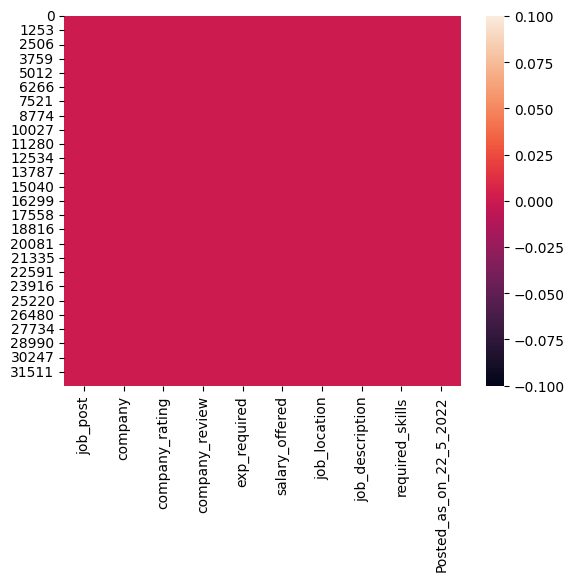

In [ ]:
#mapa de calor despues de eliminar los Nans
data.dropna(inplace=True)
sns.heatmap(data.isna())

3. Qué tipos de datos interpreta Python para cada variable?

In [ ]:
#Tipus de dades
#Obtenemos los tipos de datos
data.dtypes


job_post                   object
company                    object
company_rating            float64
company_review             object
exp_required               object
salary_offered             object
job_location               object
job_description            object
required_skills            object
Posted_as_on_22_5_2022     object
dtype: object

4. Transformar la columna 'company_review' para que se quede solamente los números y se puedan hacer los cálculos pertinentes.

In [ ]:
# Transformació columna company_review (quedarse solamente con el número para que puedan hacerse cálculos)
#TODO 
import re

lst_rev = [i.replace(' Reviews)','') for i in data.company_review]
lst_rev = [i.replace('(','') for i in lst_rev]
data["company_review"] = lst_rev
data["company_review"] = data["company_review"].astype(int)
data.dtypes

job_post                   object
company                    object
company_rating            float64
company_review              int64
exp_required               object
salary_offered             object
job_location               object
job_description            object
required_skills            object
Posted_as_on_22_5_2022     object
dtype: object

5. Discretizacion de la variable 'company_rating'. En este caso, redondear al valor entero.

In [ ]:
#Discretizar la variable 'company_rating' al valor entero.


data['company_rating_class'] = [round(i) for i in data['company_rating']]
data['company_rating_class'] = data['company_rating_class'].astype('category')

6. Obtener una variable que haga referencia a la fecha ('timestamp') que se calcule a partir de los valores de la columna 'Posted_as_on_22_5_2022'. Si os fijais en esta columna aparece los dias que hace de la oferta. Para hacer la transformación deberéis:
- Eliminar el texto de la variable 'Posted_as_on_22_5_2022'
- Timestamp será igual a el dia en que estáis haciendo la PAC (datatime.today()) menos el valor de la variable 'Posted_as_on_22_5_2022'.


In [ ]:
import datetime

In [ ]:
#Eliminamos el texto de la variable 'Posted_as_on_22_5_2022' y creamos una nueva variable

from datetime import datetime, timedelta
lst_fecha = [i.replace(' DAYS AGO','') for i in data['Posted_as_on_22_5_2022']]
lst_fecha = [i.replace('DAY AGO','') for i in lst_fecha]
lst_fecha = [i.replace('+','') for i in lst_fecha]
lst_fecha = [i.replace('TODAY','0') for i in lst_fecha]


days_to_subst = [int(i) for i in lst_fecha]


time = [datetime.today() - timedelta(days= i) for i in days_to_subst]
data['timestamp'] = [i.strftime('%d-%m-%y') for i in time]
data.head()

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022,company_rating_class,timestamp
0,Information Technology Executive,Marriott,4.2,2907,0-3 Yrs,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO,4,17-05-23
1,Associate Director-Information Technology(SAP),Unacademy,3.4,544,5-15 Yrs,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO,3,19-05-23
2,Lead - Information Technology,EchoIndia,4.0,20,11-13 Yrs,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO,4,21-05-23
3,Information Technology - Project Manager,Tata International,4.1,287,4-8 Yrs,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO,4,20-05-23
4,Information Technology Trainee,Stefanini,3.8,75,2-7 Yrs,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO,4,18-05-23


7. Representar la evolución temporal del número total de ofertas publicadas por día. Repetir la evolución pero diferenciando en líneas de colores distintos por la variable discretivada 'company_rating_class'.  

<Axes: >

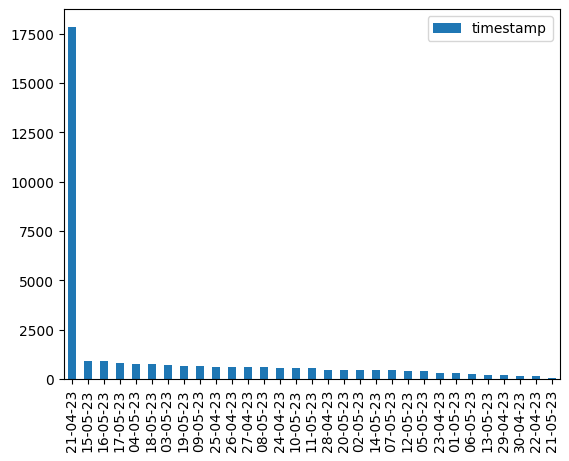

In [ ]:
#Representamos a evolución temporal del número total de ofertas publicadas por día
df = pd.DataFrame(data['timestamp'].value_counts())
df.plot(kind='bar')

In [ ]:
#Repetir la evolución pero diferenciando en líneas de colores distintos por la variable discretivada 'company_rating_class'
# Versión 1
import plotly.express as px



df1 = pd.DataFrame(data.groupby('company_rating_class')['timestamp','company_rating_class'].value_counts()).reset_index()

px.bar(df1, x="timestamp", y=0, color="company_rating_class", barmode="group")



<ipython-input-88-c379ea1dc874>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = pd.DataFrame(data.groupby('company_rating_class')['timestamp','company_rating_class'].value_counts()).reset_index()


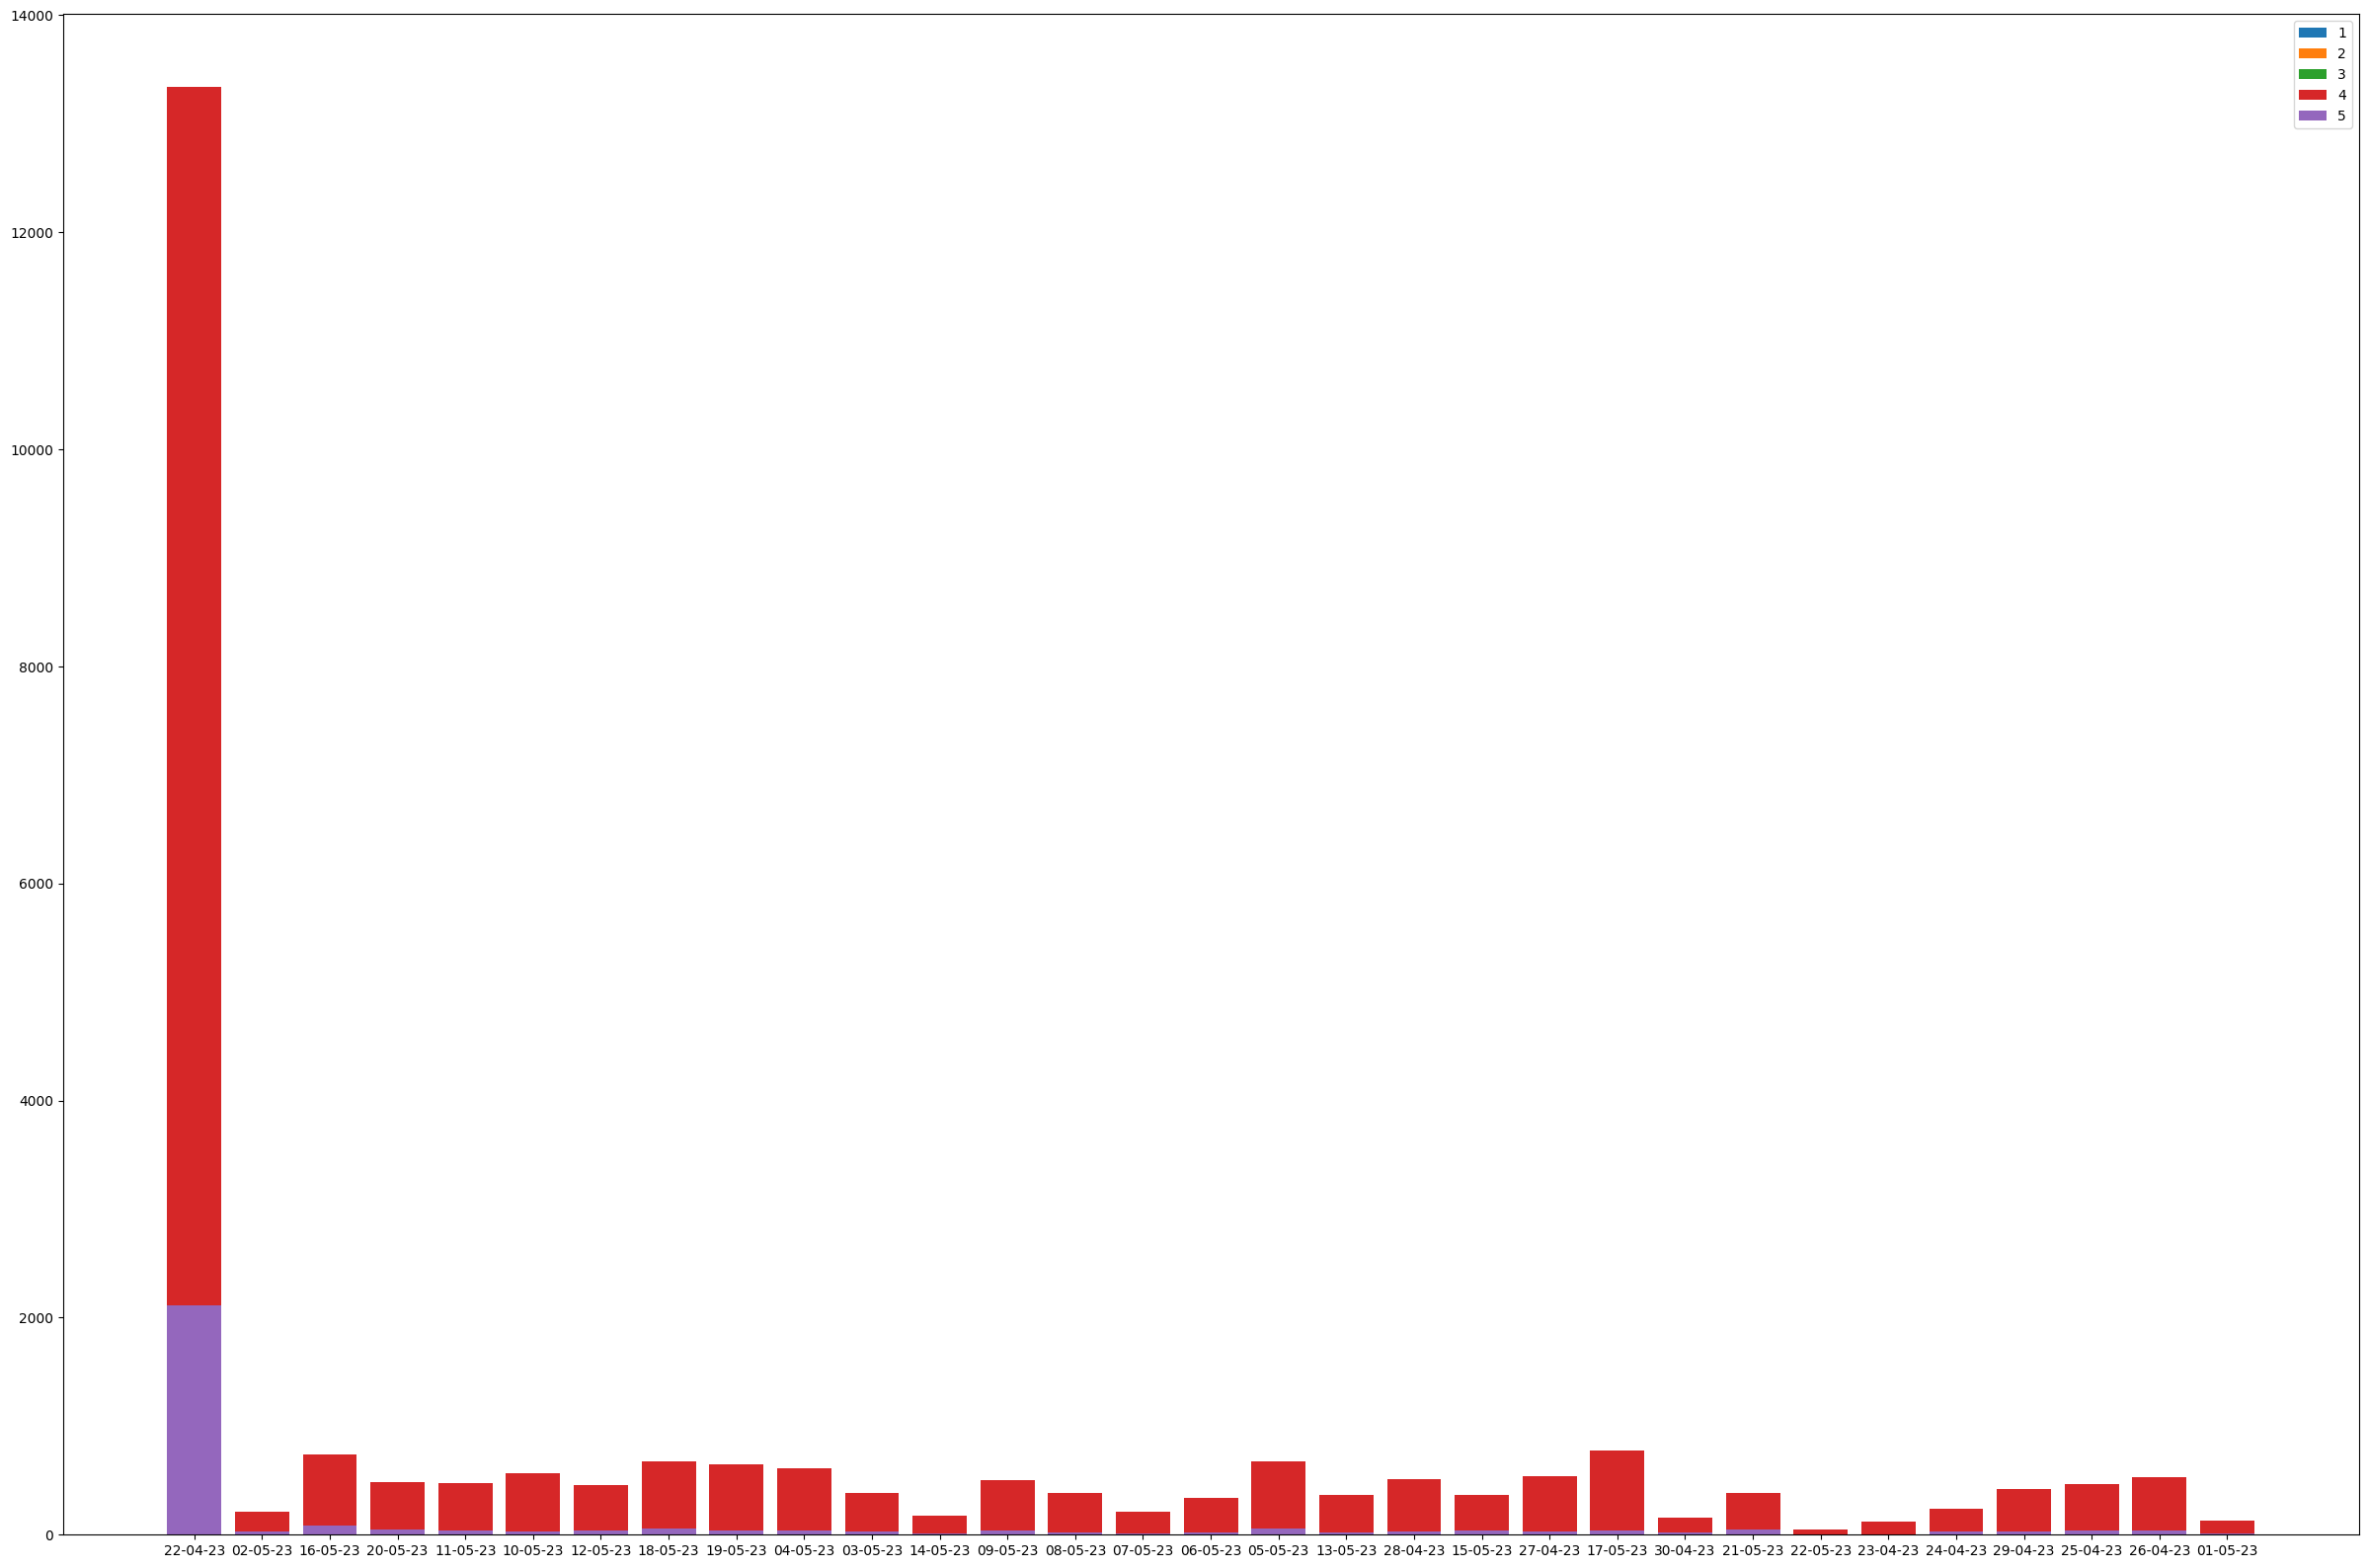

In [ ]:
#Repetir la evolución pero diferenciando en líneas de colores distintos por la variable discretivada 'company_rating_class'
# Versión 2
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))



for i in range(1,7):
  plt.legend([str(y) for y in df1['company_rating_class'].unique()])
  plt.bar( df1[df1['company_rating_class']==i]["timestamp"], df1[df1['company_rating_class']==i][0])



8. Vamos a analizar los skills demandados en las ofertas de trabajo. Si nos fijamos en el dataframe, dentro de un mismo valor de skills, aparecen más de uno separados por '\n'. Por ello, se solicita que obtengáis una lista con todos los skills que aparecen en las distintas ofertas. En esta lista no se requiere mantener la referencia a la posición de trabajo en la que se encuentra.

In [ ]:
#lista con todos los skills que aparecen en las distintas ofertas

lst_skil = [i.split('\n') for i in data['required_skills']]

flat_list = []
for sublist in lst_skil:
    for item in sublist:
        flat_list.append(item)

df_skill = pd.DataFrame(flat_list ) 
df_skill.value_counts().head()

lst_skills = [i for i in df_skill[0].unique()]

- ¿Cuántas skills distintas encontramos? ¿Cuáles son las 30 skills más solicitadas? 

In [ ]:
#¿Cuántas skills distintas encontramos? 
print("Hay {} capacidades distintas".format(len(lst_skills)))

Hay 19869 capacidades distintas


In [ ]:
#¿Cuáles son las 30 skills más solicitadas?
df_skill.value_counts().head(30)

IT Skills               10879
Java                     4506
Cloud                    4048
Python                   4019
Testing                  3594
Computer science         3017
Javascript               2528
Software Development     2516
Consulting               2405
Data analysis            2322
communication            2223
Agile                    2198
Linux                    2132
Automation               2051
Analytical               1801
HTML                     1794
SQL                      1783
AWS                      1762
Azure                    1575
Networking               1525
Coding                   1468
Oracle                   1402
DevOps                   1292
CSS                      1154
Machine learning         1147
Machine Learning         1143
analytical               1126
Jenkins                  1025
C++                       970
Unix                      939
dtype: int64

- Representa en un diagrama de barras las 30 skills más solicitadas con el número de ofertas en las que aparecen. 

<Axes: xlabel='0'>

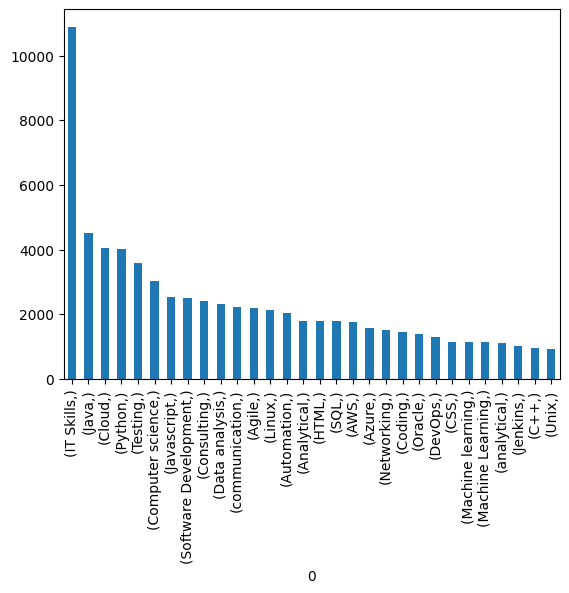

In [ ]:
#las 30 skills más solicitadas con el número de ofertas en las que aparecen
df_skill.value_counts().head(30).plot( kind='bar')

9. Crear un segundo dataframe (data2) que tenga en cuenta las instancias en las que en la columna 'exp_required' contenga el valor de años deexperiencia (Es decir, que contenga la cadena 'Yrs'). 

In [ ]:
#Creamos un segundo dataframe data2
data2= data[data['exp_required'].str.contains("Yrs")]
data2.head()

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022,company_rating_class,timestamp
0,Information Technology Executive,Marriott,4.2,2907,0-3 Yrs,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO,4,17-05-23
1,Associate Director-Information Technology(SAP),Unacademy,3.4,544,5-15 Yrs,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO,3,19-05-23
2,Lead - Information Technology,EchoIndia,4.0,20,11-13 Yrs,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO,4,21-05-23
3,Information Technology - Project Manager,Tata International,4.1,287,4-8 Yrs,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO,4,20-05-23
4,Information Technology Trainee,Stefanini,3.8,75,2-7 Yrs,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO,4,18-05-23


In [ ]:
data2.shape

(32493, 12)

10. Para evaluar numericamente la variable 'exp_required', transformar esta variable de forma que contenga el valor medio del intervalo que aparezca. Quedarse con el valor entero. Por ejemplo si el valor es 0-3, la trasformación será 1.

In [ ]:
import math
#Transformación columna 'exp_required' con la media de los años de experiencia del intervalo señalado
#TODO
lst = [i.replace(" Yrs","") for  i in data2['exp_required']]
start_yer = data2['exp_required'].str.replace(r'-\d.+', '').astype('int')
end_yer = data2['exp_required'].str.replace(r'[ \- Yrs]', ' ').str.replace(r'^\d+', ' ').astype('int')

data2["end_yer"] = end_yer
data2["start_yer"] = start_yer

#lst2 = round(start_yer+end_yer/range(start_yer,end_yer))

#data2['exp_required_mean'] = data2[['start_yer','end_yer']].mean(axis=1)
data2['exp_required'] = [math.trunc(i) for i in data2[['start_yer','end_yer']].mean(axis=1)]
#lst2 = [math.trunc(i) for i in start_yer+end_yer/2]

#data2['exp_required'] = lst2

#for i in range(len(data2)):
 # print(list(range(start_yer[i],end_yer[i]+1)))
data2 = data2.drop(["start_yer","end_yer"],axis=1)
data2.head()

<ipython-input-99-13575cae0699>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-99-13575cae0699>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-99-13575cae0699>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-13575cae0699>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-13575cae0699>:14: SettingWithCopyWarning:


A value is trying to be se

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022,company_rating_class,timestamp
0,Information Technology Executive,Marriott,4.2,2907,1,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO,4,17-05-23
1,Associate Director-Information Technology(SAP),Unacademy,3.4,544,10,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO,3,19-05-23
2,Lead - Information Technology,EchoIndia,4.0,20,12,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO,4,21-05-23
3,Information Technology - Project Manager,Tata International,4.1,287,6,Not disclosed,Mumbai (All Areas),Should be able to manage a project using vario...,project management\nit projects\ninformation t...,2 DAYS AGO,4,20-05-23
4,Information Technology Trainee,Stefanini,3.8,75,4,Not disclosed,Noida,The resource will be expected to cross skill\t...,POP\nTraining\nBasic\nNetworking\nIntern\nIT i...,4 DAYS AGO,4,18-05-23


11. ¿Cuantas ofertas de trabajo aparecen para cada valor de los años de experiencias? Representar el diagrama de frecuencias de numero de ofertas por cada valor de los años de experiencia.

In [ ]:
# Número de las ofertas de trabajo  para cada valor de los años de experiencias
data2.value_counts('exp_required')


exp_required
5     4959
4     4877
3     4260
6     3820
7     3395
2     2393
1     1750
8     1497
9     1379
10    1068
0      970
12     563
11     404
13     366
15     253
16     148
17     129
14      98
20      82
19      46
18      20
22       7
23       5
21       3
25       1
dtype: int64

<Axes: xlabel='exp_required'>

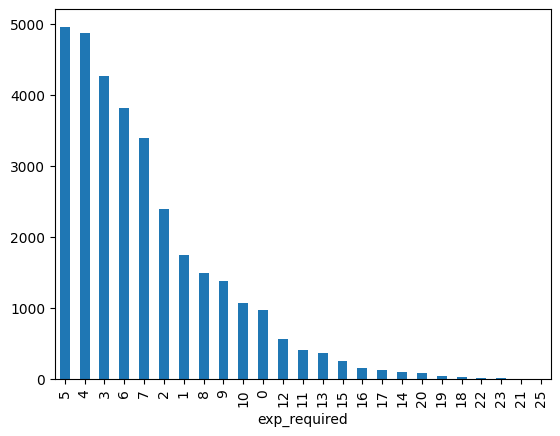

In [ ]:
#el diagrama de frecuencias de numero de ofertas por cada valor de los años de experiencia.
data2.value_counts('exp_required').plot(kind='bar')



12. ¿Cuáles son las 20 compañias que ofrecen más post_positions? Mostrar un dataframe con el nombre de la compañia y el total de posiciones de trabajo totales para cada una de ellas. 

In [ ]:
# 20 compañias que ofrecen más post_positions

df_comp = pd.DataFrame(data2.value_counts('company').head(20)).reset_index().rename(columns = {0:'Número ofertas'})
df_comp

,company,Número ofertas
0,Accenture,2391
1,IBM,1406
2,Microsoft,807
3,DXC Technology,549
4,Infostretch solutions Pvt. Ltd.,519
5,AgreeYa,463
6,Optum,359
7,Walmart,359
8,L&T Infotech (LTI),331
9,QuEST Global,299


13. Añadir al dataframe anterior el número de dias distintos que estas compañias han publicado una oferta. Añadir otra columna que haga referencia al numero de ofertas/num dias distintos de publicación.


In [ ]:
#Añadimos al dataframe anterior el número de dias distintos que estas compañias han publicado una oferta
# y la columna que haga referencia al numero de ofertas/num dias distintos de publicación

lst_num_dia = []


for i in df_comp['company']:
  lst_num_dia.append(len(data2[data2['company']==i]['timestamp'].unique()))

df_comp['num_días_distintos'] = lst_num_dia

df_comp['ofertas/num_dias'] = df_comp["Número ofertas"]/df_comp['num_días_distintos']

df_comp.head()



,company,Número ofertas,num_días_distintos,ofertas/num_dias
0,Accenture,2391,29,82.448276
1,IBM,1406,28,50.214286
2,Microsoft,807,28,28.821429
3,DXC Technology,549,22,24.954545
4,Infostretch solutions Pvt. Ltd.,519,10,51.900000


14. Añadir al dataframe anterior otro campo que haga referencia al 'company_rating' de la compañia. 

In [ ]:
#Añadimos la columna 'company_rating'

lst_rating = []


for i in df_comp['company']:
  lst_rating.append(data2[data2['company']==i]['company_rating'].reset_index(drop=True)[0])

df_comp['company_rating'] = [i for i in lst_rating]
df_comp.head()



,company,Número ofertas,num_días_distintos,ofertas/num_dias,company_rating
0,Accenture,2391,29,82.448276,4.1
1,IBM,1406,28,50.214286,4.2
2,Microsoft,807,28,28.821429,4.3
3,DXC Technology,549,22,24.954545,3.8
4,Infostretch solutions Pvt. Ltd.,519,10,51.900000,3.6


15. A partir del dataset creado, representar en un gráfico de dos ejes: (1) En un diagrama de barras, el número de ofertas;  (2) En forma de línea el ratio que le corresponde a cada compañia. En el eje X, se verán las 20 compañias.

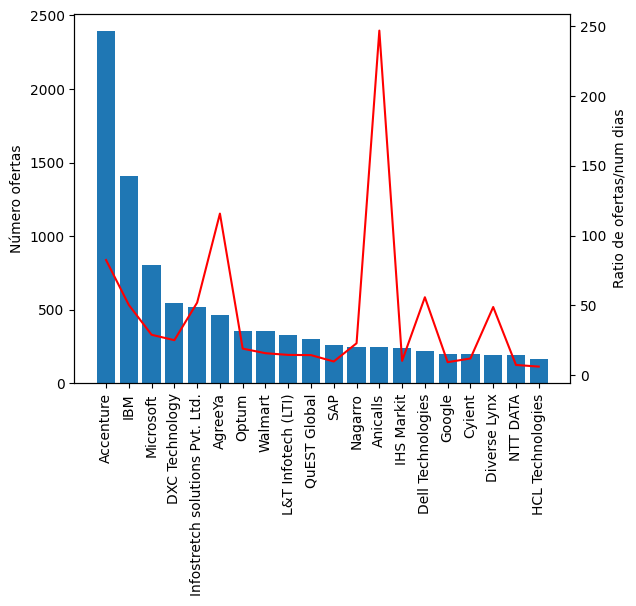

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xticks(rotation=90)
ax.set_ylabel("Número ofertas")
ax.bar(df_comp['company'],df_comp['Número ofertas'])
ax2 = ax.twinx()
ax2.set_ylabel("Ratio de ofertas/num dias")
ax2.plot(df_comp['company'],df_comp['ofertas/num_dias'],linestyle = 'solid',color='r',label = 'ofertas/num_dias')

16. ¿Cuantas compañias tienen publicadas ofertas de trabajo en más de 20 sitios distintos? ¿Cuáles?

In [ ]:
#¿Cuantas compañias tienen publicadas ofertas de trabajo en más de 20 sitios distintos? ¿Cuáles?


df_job = pd.DataFrame(data2.groupby("company")['job_post'].unique()).reset_index().reset_index(drop=True)
df_job["len_job_post"] = [len(i) for i in df_job["job_post"]]
len(df_job[df_job["len_job_post"]>20]["company"])

print("El número de compañias con ofertas publicadas en más de 20 sitios distintos es: {}".format(len(df_job[df_job["len_job_post"]>20]["company"])))

print("\n\nSon las siguentes compañías :\n {}".format([i for i in df_job[df_job["len_job_post"]>20]["company"]]))

El número de compañias con ofertas publicadas en más de 20 sitios distintos es: 126


Son las siguentes compañías :
 ['3D PLM Software Solutions Ltd.', 'AWC Software Pvt. Ltd.', 'Accenture', 'Accolite Software India Pvt Ltd', 'Adidas', 'Aeries Technology Group', 'AgreeYa', 'AgreeYa Solutions', 'Akamai', 'Allscripts India pvt. ltd.', 'Amazon', 'Ameriprise Financial', 'Anicalls', 'Atlassian', 'AutoCAD', 'BNY Mellon', 'Bajaj Finserv', 'Blue Yonder', 'Boston Consulting Group', 'Brillio', 'Cadence Design Systems', 'Capco', 'Capgemini', 'CarDekho', 'Cerner', 'CitiusTech', 'Coforge', 'Cognizant', 'Concentrix', 'Cyient', 'DXC Technology', 'Dell Technologies', 'Deutsche Bank', 'Diverse Lynx', 'Druva', 'Dun & Bradstreet', 'E2open, LLC', 'EA Games (Electronic Arts)', 'EXL', 'EY', 'Engineer.ai - Everyones Engineering Team', 'Eurofins It Solutions', 'Evolent Health', 'FACTSET SYSTEMS INDIA PVT LTD', 'FireEye CyberSecurity Pvt Ltd', 'Fiserv', 'Flipkart', 'Gartner India Research &amp; Advisory Servic

17. Dibuja el histograma d ela variable 'company_rating'. ¿Qué tipo de distribución adviertes visualmente? 

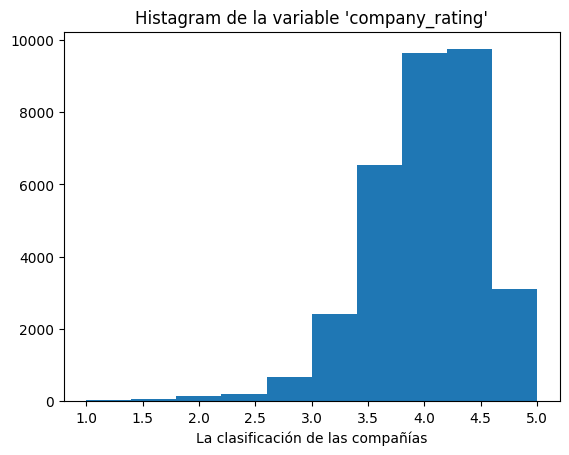



Visualmente, el histagram de la variable 'company_rating' tiene una distribución normal con una cola hacia izquierda.
También, observamos que prevalen los valores de 3.5 a 4.5


In [ ]:
#TODO
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlabel("La clasificación de las compañías")

ax.hist(data2['company_rating'])
plt.title("Histagram de la variable 'company_rating'")
plt.show()
print("\n\nVisualmente, el histagram de la variable 'company_rating' tiene una distribución normal con una cola hacia izquierda.\nTambién, observamos que prevalen los valores de 3.5 a 4.5")

18. Transformar la variable 'salary_offered' para poder hacer calculos y utilizarla como variable numérica. Para ello:
- Considerar solamente aquellos valores que ofrezcan un rango de salario. Nos quedaremos con el límite inferior. Es decir, si el valor es 20000-40000, nos quedaremos con 20000.
- Elimina las ',' para que pueda ser interpretado el valor correctamente. 



In [ ]:
data2["salary_offered"].unique()

array(['Not disclosed', '1,50,000 - 1,75,000 PA.',
       '7,00,000 - 12,00,000 PA.', '10,00,000 - 20,00,000 PA.',
       '2,50,000 - 4,00,000 PA.', '25,00,000 - 35,00,000 PA.',
       '2,00,000 - 3,00,000 PA.', '3,00,000 - 5,50,000 PA.',
       '3,00,000 - 5,00,000 PA.', '8,00,000 - 10,00,000 PA.',
       '1,00,000 - 3,50,000 PA.', '1,00,000 - 1,75,000 PA.',
       '2,00,000 - 7,00,000 PA. (Including Variable: 10.0%)',
       '1,00,000 - 4,75,000 PA.', '4,00,000 - 4,75,000 PA.',
       '10,00,000 - 16,00,000 PA.', '4,00,000 - 8,00,000 PA.',
       '5,00,000 - 8,00,000 PA.', '20,00,000 - 35,00,000 PA.',
       '20,00,000 - 22,50,000 PA.', '3,00,000 - 3,75,000 PA.',
       '2,00,000 - 2,50,000 PA.', '1,50,000 - 2,25,000 PA.',
       '3,50,000 - 5,50,000 PA.', '2,50,000 - 3,00,000 PA.',
       '2,00,000 - 7,00,000 PA.', '20,00,000 - 25,00,000 PA.',
       '5,00,000 - 10,00,000 PA.', '6,00,000 - 12,00,000 PA.',
       '5,00,000 PA.', '3,00,000 PA.', '4,00,000 - 7,50,000 PA.',
       '2,00

In [ ]:
#Eliminamos las ','  y otros elementos para que pueda ser interpretado el valor correctamente

lst_sal = [i.replace(",","") for i in data2["salary_offered"]]
lst_sal = [i.replace("Not disclosed","Nan") for i in lst_sal]

lst_sal =[re.sub(r"1 Cr and above","Nan",i) for i in lst_sal]
lst_sal =[re.sub(r'\s.*',"",i) for i in lst_sal]

set(lst_sal)




{'100000',
 '1000000',
 '1100000',
 '1200000',
 '125000',
 '1300000',
 '1400000',
 '150000',
 '1500000',
 '1600000',
 '1700000',
 '175000',
 '1800000',
 '1900000',
 '200000',
 '2000000',
 '225000',
 '2250000',
 '250000',
 '2500000',
 '275000',
 '300000',
 '3000000',
 '325000',
 '3250000',
 '350000',
 '3500000',
 '375000',
 '3750000',
 '400000',
 '4000000',
 '425000',
 '450000',
 '4500000',
 '475000',
 '50000',
 '500000',
 '5000000',
 '550000',
 '60000',
 '600000',
 '650000',
 '70000',
 '700000',
 '750000',
 '80000',
 '800000',
 '850000',
 '90000',
 '900000',
 '950000',
 'Nan'}

19. A partir de la transformación de la variable del salario, crear un tercer dataframe (data3) que contenga solamente datos válidos de 'salary_offered'. Es decir, excluir aquellos registros cuyo salary_offered valga '' o similares. Asegurarse de que el tipo de esta variable es float. Representar el histograma de esta variable en el data3. 

In [ ]:
data3 = data2.copy()

data3["salary_offered"] = lst_sal
data3["salary_offered"] = data3["salary_offered"].astype(float)
data3 = data3.dropna()



data3.reset_index(drop=True,inplace=True)

data3.head(10)

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022,company_rating_class,timestamp
0,Information Technology,OPPO,4.0,3410,1,150000.0,Mumbai (All Areas),Any Graduate Preferred*Immediate Joiners and c...,information technology\nDesktop Support\nAntiv...,12 DAYS AGO,4,10-05-23
1,HCL || 5G-Software Engineer,HCL Technologies,3.8,19170,0,700000.0,"Chennai, Bangalore/Bengaluru, Delhi / NCR",Experience of working on related area either i...,Java\nIT Skills\nPython\nCloud\nC++\nCSS\nSix ...,6 DAYS AGO,4,16-05-23
2,Senior Software Development Engineer,Oracle,3.9,3298,2,1000000.0,"Hyderabad/Secunderabad, Pune, Bangalore/Bengal...","Atleast 1 years of relevant IT experience, pre...",Java\nj2ee\nIT Skills\nSoftware Development\nT...,24 DAYS AGO,4,28-04-23
3,HCL || ERX-Software Engineer,HCL Technologies,3.8,19170,0,700000.0,"Chennai, Bangalore/Bengaluru, Delhi / NCR","HCL is #Hiring freshers (B.Tech, B.E) from Tie...",c++\nIT Skills\nPython\nHTML\nJavascript\nJava...,6 DAYS AGO,4,16-05-23
4,HCL || 5G-Software Engineer,HCL Technologies,3.8,19170,0,700000.0,"Chennai, Bangalore/Bengaluru, Delhi / NCR",Experience of working on related area either i...,Java\nIT Skills\nPython\nCloud\nC++\nCSS\nSix ...,6 DAYS AGO,4,16-05-23
5,IT Deployment Specialist,Convene India Private Limited,3.6,2,1,250000.0,Noida(Sector-62 Noida),Flexible and can adapt to changing shift sched...,Deployment Specialist\nIT Deployment specialis...,2 DAYS AGO,4,20-05-23
6,Information Technology Team Lead - Node.js,UPLERS SOLUTIONS PRIVATE LIMITED,4.4,208,5,2500000.0,"Chennai, Bangalore/Bengaluru, Mumbai (All Areas)",This position requires extensive experience of...,PHP\nNode.Js\nReact.Js\nIT Skills\nCloud\nDevO...,30+ DAYS AGO,4,22-04-23
7,Software Development Manager,BASAWA TECHNOLOGIES LTD.,3.5,3,2,200000.0,Delhi / NCR,Young enthusiast freshers are required as trai...,application software\nC++\njava\nCoding And De...,15 DAYS AGO,4,07-05-23
8,Job Opportunity|| Trainee Software Engineer|| ...,NIRVANA SOLUTIONS INDIA PRIVATE LIMITED,3.8,29,0,300000.0,Gurgaon/Gurugram,5 Days Working with flexibility of work from h...,Application Programming\nSoftware Development\...,11 DAYS AGO,4,11-05-23
9,Associate Software Engineer,Innostax Software Labs Pvt. Ltd,4.0,14,0,300000.0,Gurgaon/Gurugram(Sohna Road),tech / BCA/BE/ BSc/ M.tech/ MCA / MSc- Compute...,Java\nC#\nDotnet Development\nCSS\nSoftware De...,23 DAYS AGO,4,29-04-23


<ipython-input-113-931f92e78229>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



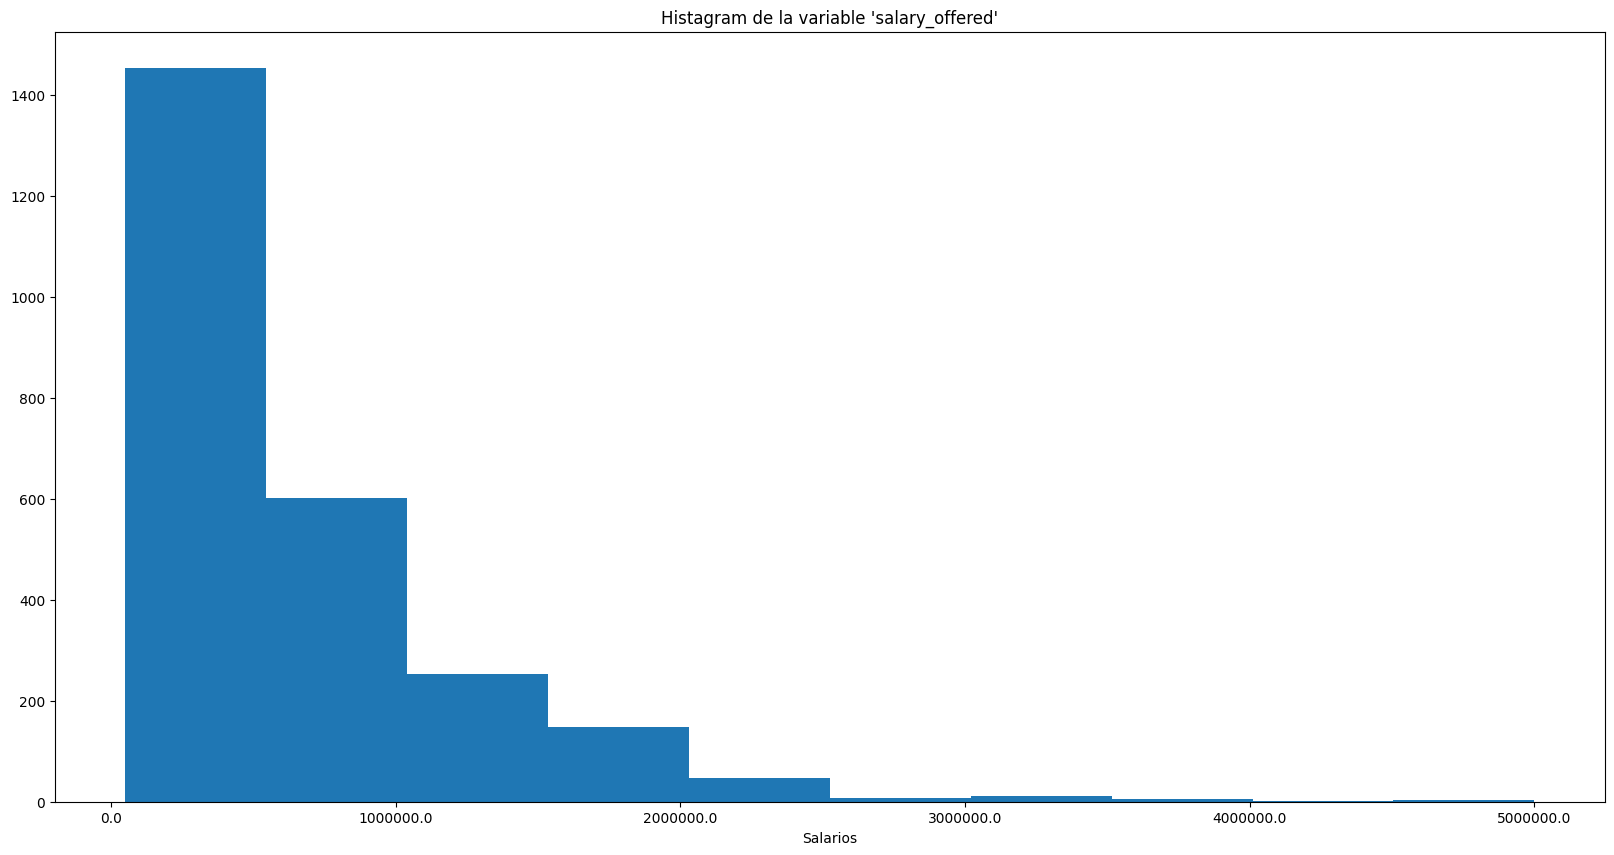

In [ ]:
#Representar el histograma de esta variable en el data3.


fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel("Salarios")

ax.hist(data3['salary_offered'])
#plt.xticks(ticks=[int(data3['salary_offered'].min()),500000,int(data3['salary_offered'].max())], rotation=90)
plt.title("Histagram de la variable 'salary_offered'")
ax.set_xticklabels([f"{t}" for t in ax.get_xticks()])
plt.show()


## Ejercicio 3


En esta parte de la PAC, vamos a utilizar la adaptación de un dataset que recoge más de 1400 respuestas a una encuesta cuyo objetivo es evaluar la salud mental de los trabajadores en su lugar de trabajo. Las columnas del dataset son las siguientes:

- 'Age',
- 'Gender',
- 'Country',
- 'State',
- 'self_employed' (si es autónomo),
- 'family_history' (si hay algún familiar que padece problemas de salud mental),
- 'treatment' (Si ha recibido tratamiento para su salud mental),
- 'work_interfere' (tu condición de salud mental notas que afecta a tu trabajo),
- 'size_employees' (categoría de empresa según su tamaño y número de empleados),
- 'remote_work' (si realiza trabajo remoto),
- 'tech_company' (si la compañia es del sector tecnológico),
- 'benefits' (si la empresa hace acciones en beneficio de la salud mental),
- 'care_options' (si conoce las opciones para cuidar la salud mental que ofrece la empresa),
- 'wellness_program' (si la empresa dispone de un programa para el bienestar),
- 'seek_help'(si la empresa proporciona herramientas para poder buscar y encontrar ayuda en cuanto a salud mental),
- 'anonymity' (si la empresa guarda el anonimato si se disfruta de los beneficios relativos a salud mental),
- 'mental_health_consequence' (si piensa que hablar de problemas de salud mental podría tener consecuencias en las condiciones de trabajo),
- 'phys_health_consequence' (si piensa que hablar de problemas de salud no-mental podría tener consecuencias en las condiciones de trabajo),
- 'coworkers' (si hablaría de los problemas de salud mental con sus compañeros),
- 'supervisor' (si hablaría de sus problemas con su supervisor)


Con este dataset, además de preparar los datos, vamos a plantear qué tipo de problema (regresión o clasificación) podríamos resolver con el dataset preparado. 


**Parte A.** Como primer paso se solicita evaluar las variables del dataset y prepararlas según las especificaciones planteadas:

1.	Cargar el dataset e indicar el tipo de dato que es cada columna. 

In [ ]:
## TODO

from google.colab import files
data= files.upload()

Saving survey_16.csv to survey_16 (1).csv


In [ ]:
## TODO
import pandas as pd

df = pd.read_csv("survey_16.csv")
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
0,37,Female,United States,IL,NaN,No,Yes,Often,2,No,Yes,Yes,Not sure,No,Yes,Yes,No,No,Some of them,Yes
1,44,M,United States,IN,NaN,No,No,Rarely,6,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,2,No,Yes,No,No,No,No,Don't know,No,No,Yes,Yes
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,3,No,Yes,No,Yes,No,No,No,Yes,Yes,Some of them,No
4,31,Male,United States,TX,NaN,No,No,Never,4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes


2.	Especificaciones para preparar las variables:
- Age: Poner a NAN los valores que sean anómalos (valores negativos, valores irreales,…)
-	Country, State: Eliminar estas variables
-	Gender: codificar el gérero de acuerdo a las siguientes consideraciones:
  - Valores que hagan referencia a mujer: 1
  -	Valores que hagan referencia a hombre: 0
  - El resto de valores: 2
- Binarizar las siguientes variables de acuerdo a la codificación: Yes=1; No=0; el resto=NAN
  -	Self_employed
  -	Family_history
  -	Treatment
  -	Remote_work
  -	Tech_company
  -	Benefits
  -	Care_options
  -	Wellness_program
  -	Seek_help
  -	Anonymity
  -	Mental_health_consequence
  -	Coworkers
  -	Supervisor
-	Convertir en variable ordinal la variable work_interfere, asignando valores del 0 al 3, de acuerdo con la frecuencia. A los valores que tengan un valor NAN, mantener su valor a NAN.


In [ ]:
df.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
## Variable age --> sustituir valores anomalos por nan
#TODO
import numpy as np

df.loc[df.Age < 0, 'Age'] = np.nan
df.loc[df.Age > 100, 'Age'] = np.nan
print(df.Age.unique())


[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21. nan 43. 56. 60. 54. 55. 48. 20.
 57. 58. 47. 62. 51. 65. 49.  5. 53. 61.  8. 11. 72.]


In [ ]:
# Country, State: Eliminar estas variables

#TODO
df = df.drop(["Country"	,"state"],axis=1)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
0,37.0,Female,NaN,No,Yes,Often,2,No,Yes,Yes,Not sure,No,Yes,Yes,No,No,Some of them,Yes
1,44.0,M,NaN,No,No,Rarely,6,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32.0,Male,NaN,No,No,Rarely,2,No,Yes,No,No,No,No,Don't know,No,No,Yes,Yes
3,31.0,Male,NaN,Yes,Yes,Often,3,No,Yes,No,Yes,No,No,No,Yes,Yes,Some of them,No
4,31.0,Male,NaN,No,No,Never,4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes


In [ ]:
# Gender: codificar el gérero de acuerdo a las consideraciones
lst_male =['M', 'Male', 'male','m','maile','Male ', 'Man','Cis Male','cis male','Cis Man','Male (CIS)']
lst_female = ['Female','female','Cis Female', 'F','Woman', 'f','woman','Female ','cis-female/femme','Female (cis)','femail']
lst_= [1,0]

df.loc[df.Gender.isin(lst_male), 'Gender'] = 0
df.loc[df.Gender.isin(lst_female), 'Gender'] = 1
df.loc[~df.Gender.isin(lst_), 'Gender'] = 2

print(df["Gender"].unique())
df

[1 0 2]


,Age,Gender,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
0,37.0,1,NaN,No,Yes,Often,2,No,Yes,Yes,Not sure,No,Yes,Yes,No,No,Some of them,Yes
1,44.0,0,NaN,No,No,Rarely,6,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32.0,0,NaN,No,No,Rarely,2,No,Yes,No,No,No,No,Don't know,No,No,Yes,Yes
3,31.0,0,NaN,Yes,Yes,Often,3,No,Yes,No,Yes,No,No,No,Yes,Yes,Some of them,No
4,31.0,0,NaN,No,No,Never,4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,0,No,No,Yes,NaN,3,No,Yes,No,No,No,No,Don't know,No,No,Some of them,Some of them
1255,32.0,0,No,Yes,Yes,Often,3,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Some of them,Yes
1256,34.0,0,No,Yes,Yes,Sometimes,6,No,Yes,Yes,Yes,No,No,Don't know,Yes,Yes,No,No
1257,46.0,1,No,No,No,NaN,4,Yes,Yes,No,Yes,No,No,Don't know,Yes,No,No,No


In [ ]:
# Binarizar variables especificadas

lst_col = ["self_employed","family_history","treatment","remote_work","tech_company","benefits","care_options","wellness_program","seek_help","anonymity",
"mental_health_consequence","coworkers","supervisor","phys_health_consequence"	]
#TODO

lst_nan = ["nan",'Not sure','Maybe','Some of them',"Don't know"]

for i in lst_col:
  df.loc[df[i] == "No", i] = 0
  df.loc[df[i] == "Yes", i] = 1
  df.loc[df[i].isin(lst_nan), i] = np.nan


In [ ]:
# Convertir en variable ordinal la variable work_interfere

#TODO


df.work_interfere.astype('category')
df.loc[df['work_interfere'] == 'Never', 'work_interfere'] = 0
df.loc[df['work_interfere'] == 'Often', 'work_interfere'] = 1
df.loc[df['work_interfere'] == 'Rarely', 'work_interfere'] = 2
df.loc[df['work_interfere'] == 'Sometimes', 'work_interfere'] = 3



3.	Eliminar todas las filas que tengan almenos un valor a NAN

In [ ]:
#TODO
df = df.dropna(how='any')
df.isna().any()

Age                          False
Gender                       False
self_employed                False
family_history               False
treatment                    False
work_interfere               False
size_employees               False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
dtype: bool

**Parte B. Planteamiento del problema y del modelo**

El objetivo que se quiere conseguir con el modelo es, a partir de las variables disponibles en el dataset, ser capaces de predecir si la persona está en tratamiento o no. Por tanto, las entradas serán los valores de todas las variables excepto ‘Treatment'; y la salida será la variable ‘Treatment'.

1.	¿Qué problema queremos resolver, de clasificación o de regresión? Justifícalo.

_Respuesta:_

Para responder a la pregunta planteada, hay que obtener una respuesta "sí"(1) o "no"(0). Esto nos indica que estamos ante un problema de clasificación.

2.	A continuación, se facilitan dos códigos para entrenar un posible modelo. Completa los #TODO y ejecuta el que corresponda según tu respuesta a la pregunta anterior de si es un problema de regresión o de clasificación.  

NOTA: como la fase de obtención de modelos está fuera del contenido de esta asignatura y en este ejercicio vamos a abordar el modelado de una forma muy sencilla y sin fijarnos en las métricas de bondad de ajuste, no llevaremos a cabo los procesos de training y test propios de un proceso de modelado

In [ ]:
# CÓDIGO MODELO REGRESIÓN

#from sklearn.datasets import make_classification
#from sklearn.linear_model import LinearRegression
# definir entrada-salida
#X=#
#y=#

# Definir el tipo de modelo
#model_r = LinearRegression()
# Ajustar el modelo a todo dataset
#model_r.fit(X, y)


In [ ]:

#for column in df.columns:
 # df[column] = df[column].astype(int)



In [ ]:
# CÓDIGO MODELO CLASIFICACIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# definir entrada-salida

lst_x = ['Age', 'Gender', 'self_employed', 'family_history','work_interfere', 'size_employees', 'remote_work', 'tech_company',
 'benefits', 'care_options', 'wellness_program', 'seek_help','anonymity', 'mental_health_consequence', 'phys_health_consequence','coworkers', 'supervisor']

X=df[lst_x]
y=df.treatment.astype(int)

# Definir el tipo de modelo
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',  random_state=0, max_iter=200,)
# Ajustar el modelo a todo dataset
model.fit(X, y)


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=0)

3. Una vez ajustado el modelo, contestar a si una persona que haya respondido de la siguiente forma a la encuesta, estará recibiendo tratamiento:

- 'Age': 24,
-'Gender': 1,
- 'anonymity': 0,
- 'benefits': 1,
- 'care_options': 1,
- 'coworkers': 1,
- 'family_history': 1,
- 'mental_health_consequence': 0,
- 'phys_health_consequence': 1,
- 'remote_work': 0,
- 'seek_help': 0,
- 'self_employed': 0,
- 'size_employees': 1,
- 'supervisor': 4,
- 'tech_company': 0,
- 'wellness_program': 1,
- 'work_interfere': 1

In [ ]:
#Predecir la salida del modelo teniendo en cuenta las especificaciones 
Xhat = [[24,1,0,1,1,1,1,0,1,0,0,0,1,4,0,1,1]]
df_new = pd.DataFrame(Xhat,columns=lst_x)
yhat =  model.predict(df_new)


print('¿La persona estará recibiendo tratamiento? (Si (1)/No (0)):  %s' % yhat[0])

¿La persona estará recibiendo tratamiento? (Si (1)/No (0)):  1
